### Load legacy TissueTag annotations to derive CMA axis (epaed OCT Visium)

In [ ]:
import sys 
import os
from datetime import datetime
date = datetime.now().strftime("%Y-%m-%d")
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import hdf5plugin


# Import key packages 
#import panel as pn
#import socket
#import tissue_tag as tt
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = "*"
# host = '5011' # set the port to the value in the address bar when operating in farm
# host = '8888' # when working locally e.g. desktop


# Define repo path and add it to sys path (allows to access scripts and metadata from repo)
repo_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/Spatial_analyses'
sys.path.insert(1, repo_path) 
sys.path.insert(2, '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts')


: 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
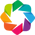

In [2]:
import panel as pn
import socket
import tissue_tag as tt

In [3]:
# Define paths for plot and path dirs
plot_path = os.path.join(repo_path, 'plots')
data_path = os.path.join(repo_path, 'data')
results_path = os.path.join(repo_path, 'results')
model_path = os.path.join(repo_path, 'models')
general_data_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/data'

In [ ]:
# Set pandas display options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

import tissue_tag_v2 as ttv2

In [5]:
%load_ext autoreload
%autoreload 2
# Import custom scripts
from utils import get_latest_version,update_obs,freq_by_donor
from anno_levels import get_ct_levels, get_ct_palette, age_group_levels, age_group_palette
#from plotting.utils import plot_grouped_boxplot, calc_figsize

In [6]:
# Set plot formatting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from matplotlib import rcParams
font_manager.fontManager.addfont("/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf")
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text

In [7]:
sc.settings.set_figure_params(dpi = 80, color_map = 'RdPu')
#plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

## Load meta and annotations

In [8]:
# anno_path = f'{data_path}/Visium_annotations'
meta_df = pd.read_excel(f'{data_path}/ThyAge_spatial_metadata_v2_2025-09-02.xlsx')

In [9]:
samples_oct = meta_df.loc[(meta_df['age_group'] == 'paed_early') & (meta_df['chemistry_simple'] == 'Visium_OCT'), 'SampleID'].tolist() 

In [1]:
def generate_cma_simple(sample, data_path, anno_name, anno_main, grid_size = 15, KNN = 10, compartments3 = ['Edge','Cortex','Medulla'], 
                        compartments2 = ['Edge','Medulla'], weights = [0.2,0.8], visium_type = 'OCT'):
    if isinstance(anno_name, list):
        df_anno_lst = list()
        for anno_name1 in anno_name:
            df_anno1 = tt.anno_to_grid(folder=f'{data_path}/{sample}/tissue_annotations/', file_name = anno_name1, spot_to_spot = grid_size)
            anno1, ppm_anno = tt.load_annotation(folder=f'{data_path}/{sample}/tissue_annotations/', file_name = anno_name1)
            df_anno1[anno_name1] = df_anno1[anno_name1].map(anno1.annotation_map).copy()
            df_anno_lst.append(df_anno1)
        import functools
        # Merge all DataFrames in df_anno_lst on ['x', 'y']
        df_anno = functools.reduce(lambda left, right: pd.merge(left, right, on=['x', 'y'], how='inner'), df_anno_lst)
    else:
        df_anno = tt.anno_to_grid(folder=f'{data_path}/{sample}/', file_name = anno_name, spot_to_spot = grid_size)
    if (visium_type == 'FFPE'):
        df_anno['annotations_cma'] = df_anno[anno_main].apply(lambda x: 'Medulla' if x == 'HC' else x)
    else:
        df_anno['annotations_cma'] = df_anno[anno_main].copy()
    print('calculating distances')
    tt.dist2cluster_fast(df=df_anno, annotation='annotations_cma', KNN=KNN)
    if isinstance(anno_name, list):
        for anno_name1 in anno_name:
            if anno_name1 != anno_main:
                tt.dist2cluster_fast(df=df_anno, annotation=anno_name1, KNN=KNN)
    # axis calculations based on 3 landmarks  - this axis is good to capture the spatial variance across the entire thymus 
    df_anno = tt.calculate_axis_3p(df_anno, anno='annotations_cma', structure=compartments3, output_col='cma_3p', w=weights)
    df_anno = tt.calculate_axis_2p(df_anno, anno='annotations_cma', structure=compartments2, output_col='cma_2p')
    # remove non-annotated spots this is better to do after axis calculations
    df_anno = df_anno[df_anno['annotations_cma']!='unassigned']
    df_anno = df_anno[df_anno['annotations_cma']!='Artifacts']
    # read visium info and map annotations  - make sure the 2 grids seem aligned
   # data_path = metadata.loc[metadata['SampleID']==sample,'Path'].values[0]
    if (visium_type == 'FFPE') and (sample not in ['THY162','THY90']): # these 2 samples have different folder structure
        _,ppm_vis,vis_df = tt.read_visium(spaceranger_dir_path=f'{data_path}/{sample}/outs/',header = 0, plot=False)
    elif (visium_type == 'FFPE') and (sample in ['THY162','THY90']):
        _,ppm_vis,vis_df = tt.read_visium(spaceranger_dir_path=f'{data_path}/{sample}/outs/', plot=False)
    else:
        _,ppm_vis,vis_df = tt.read_visium(spaceranger_dir_path=f'{data_path}/{sample}/',plot=False)
    vis_df.rename(columns={'pxl_col': "x", 'pxl_row': "y"},inplace=True) # for new spaceranger adjust for any DF not only for visium
    vis_df = tt.map_annotations_to_target(                            
        df_target=vis_df,  
        df_source=df_anno,
        ppm_target= ppm_vis,
        plot=True,
    )
    return vis_df

In [10]:
samples_oct

['TA11486162',
 'TA11556493',
 'TA11556494',
 'WSSS_THYst9142088',
 'WSSS_THYst9142089',
 'WSSS_THYst9518030',
 'WSSS_THYst9142086',
 'WSSS_THYst9142087',
 'WSSS_THYst9518032',
 'WSSS_THYst9518033',
 'TA11486164',
 'TA11556492',
 'TA11486161',
 'TA11486163',
 'TA11556495',
 'TA11556496']

loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

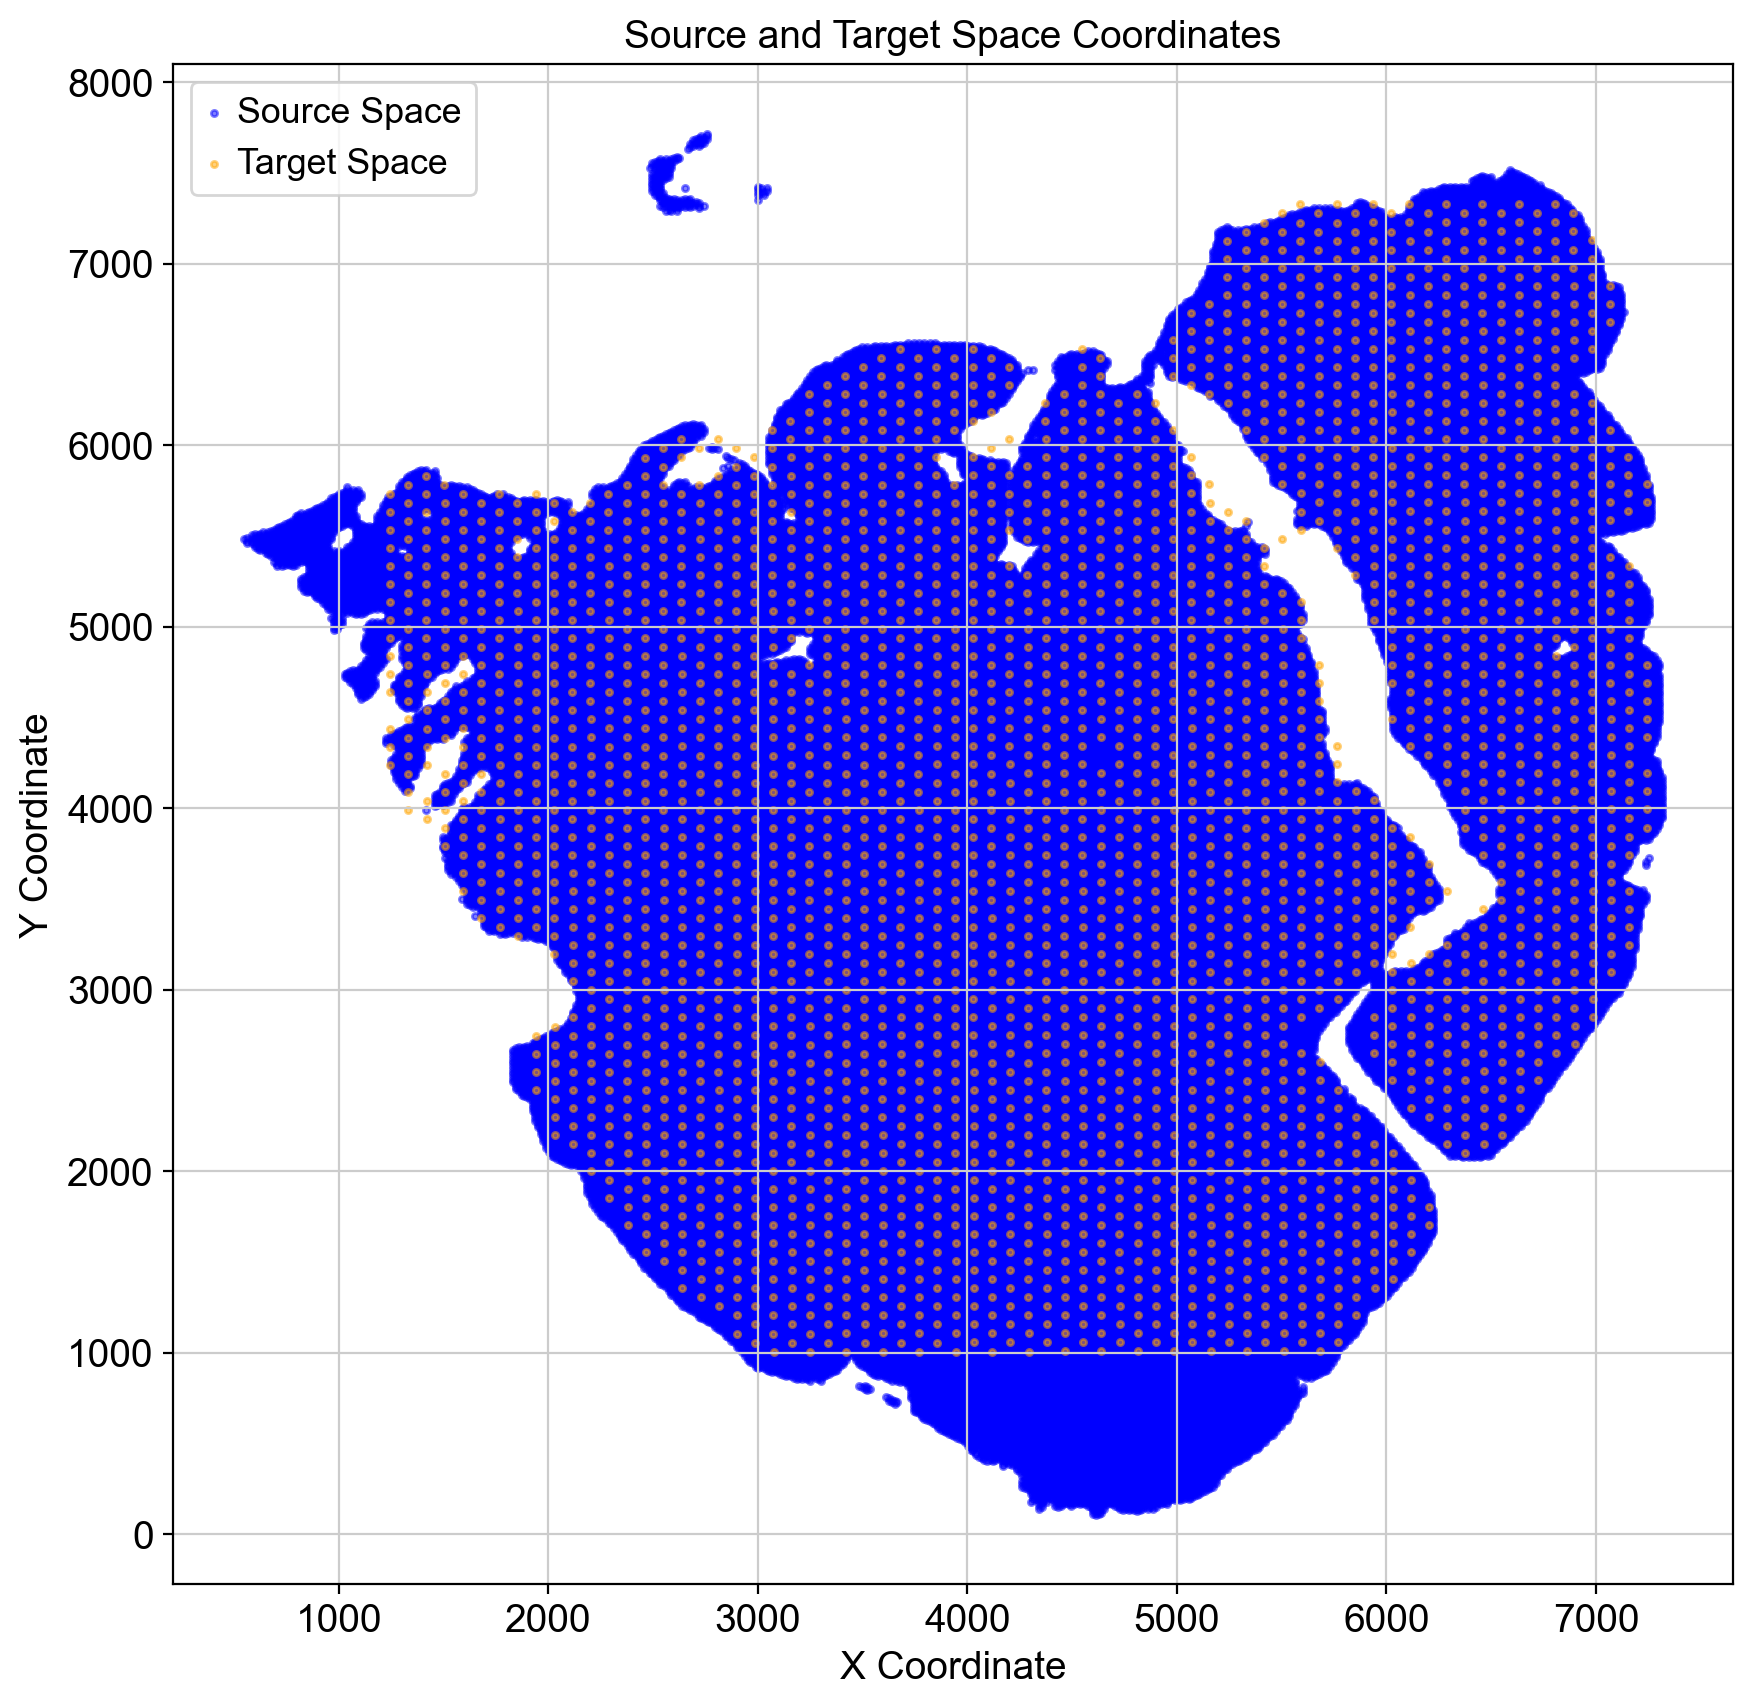

loaded annotation image - annotations_level_0 size - (4121, 4644)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4121, 4644)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4121, 4644)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4121, 4644)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

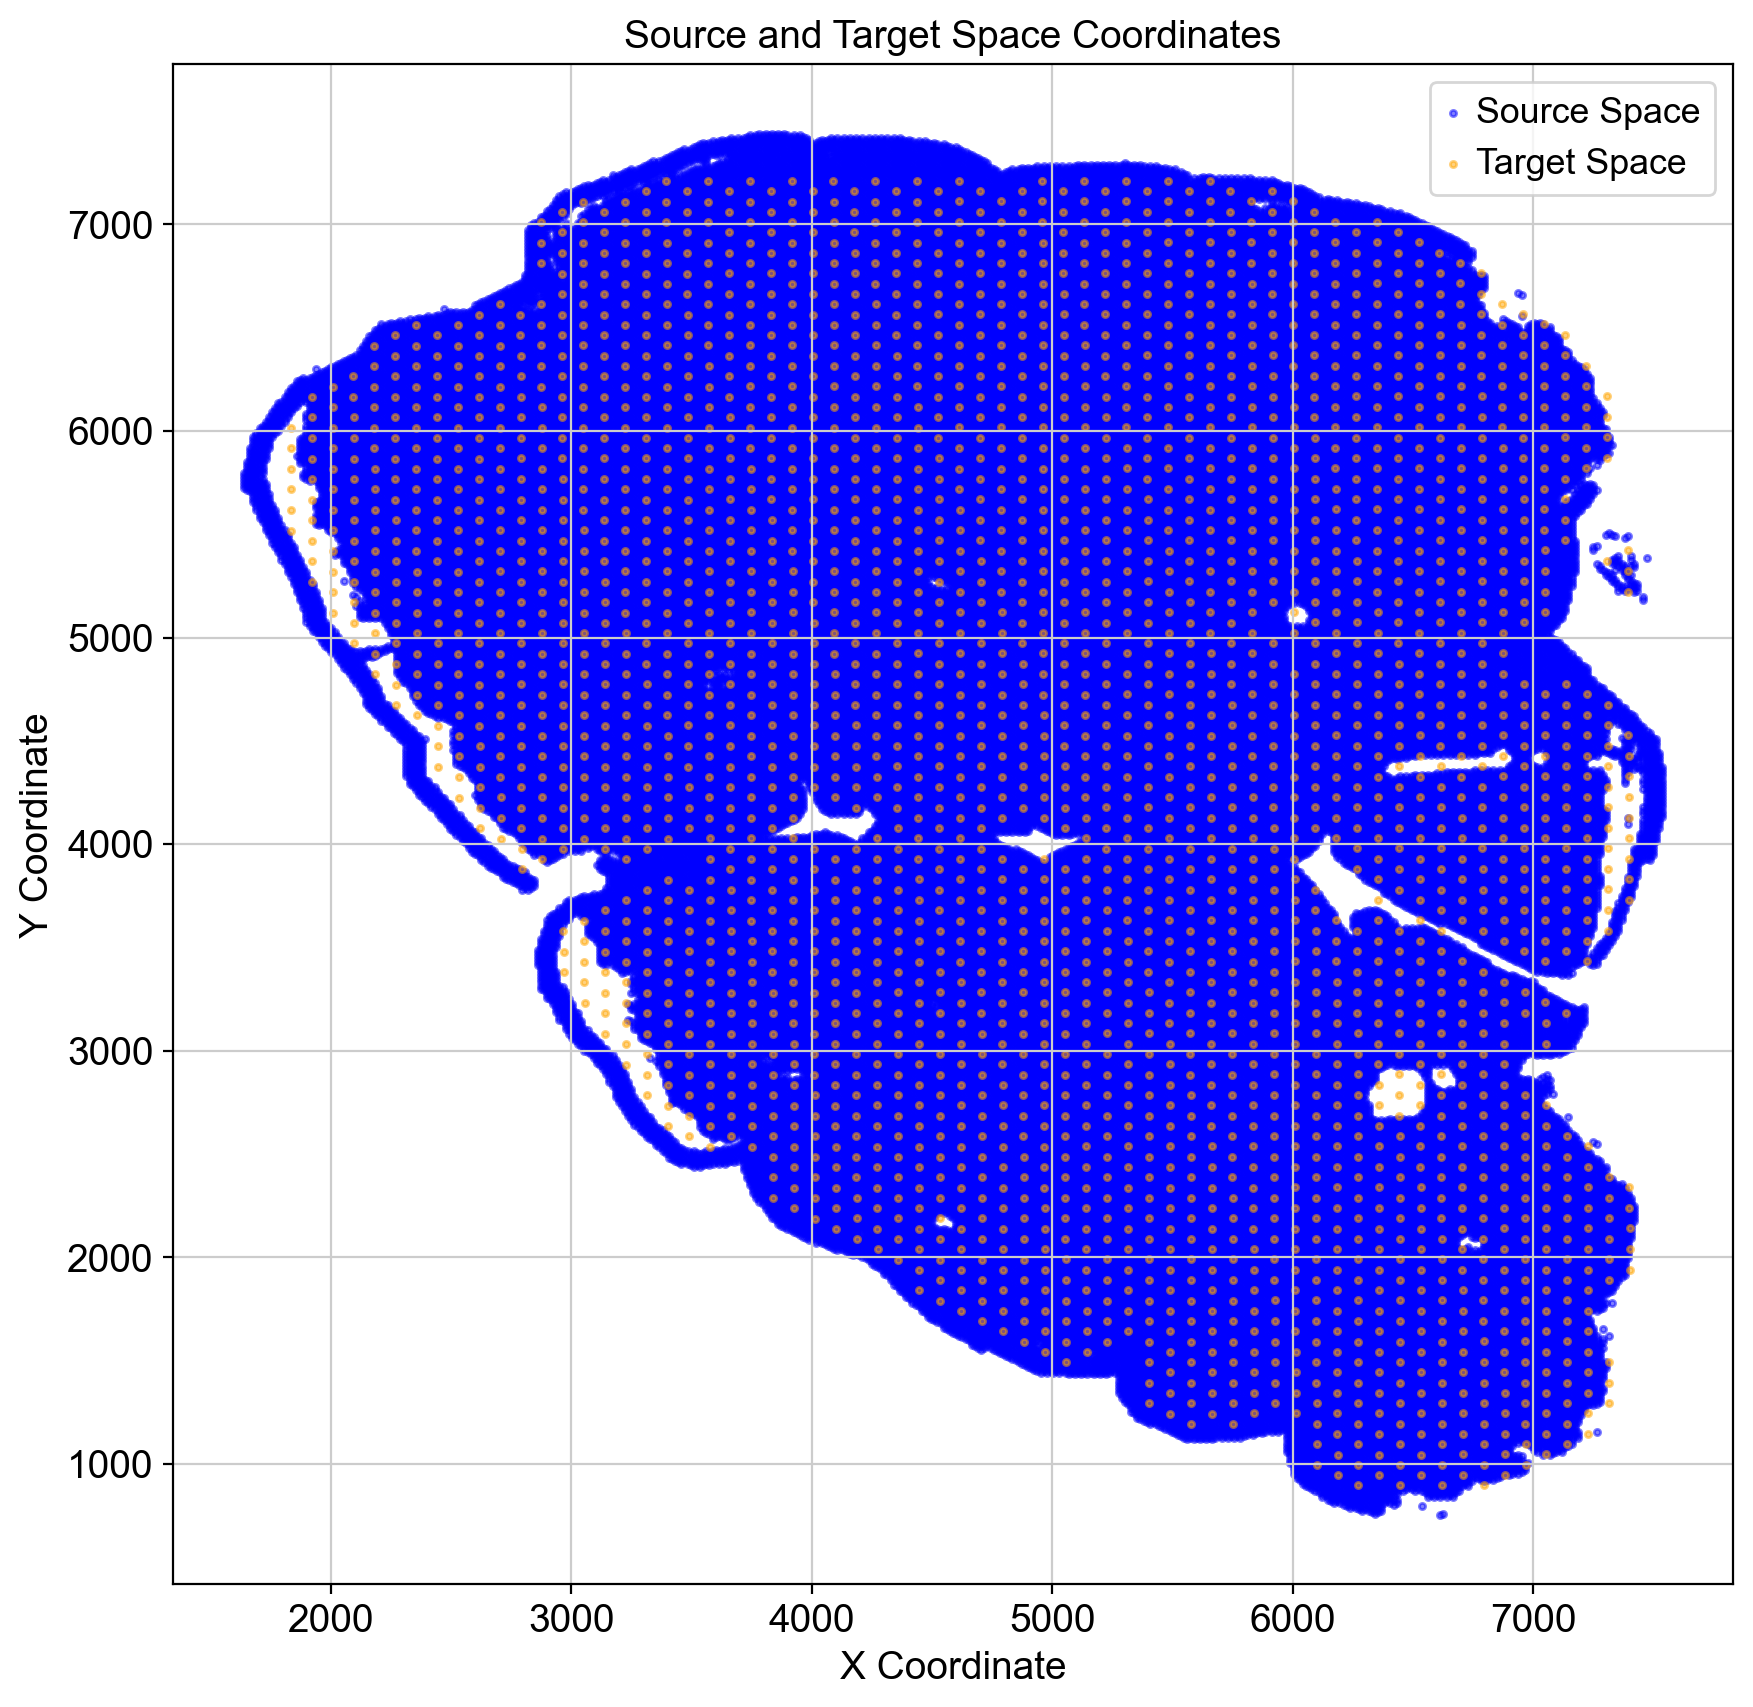

loaded annotation image - annotations_level_0 size - (4124, 4648)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4124, 4648)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4124, 4648)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4124, 4648)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

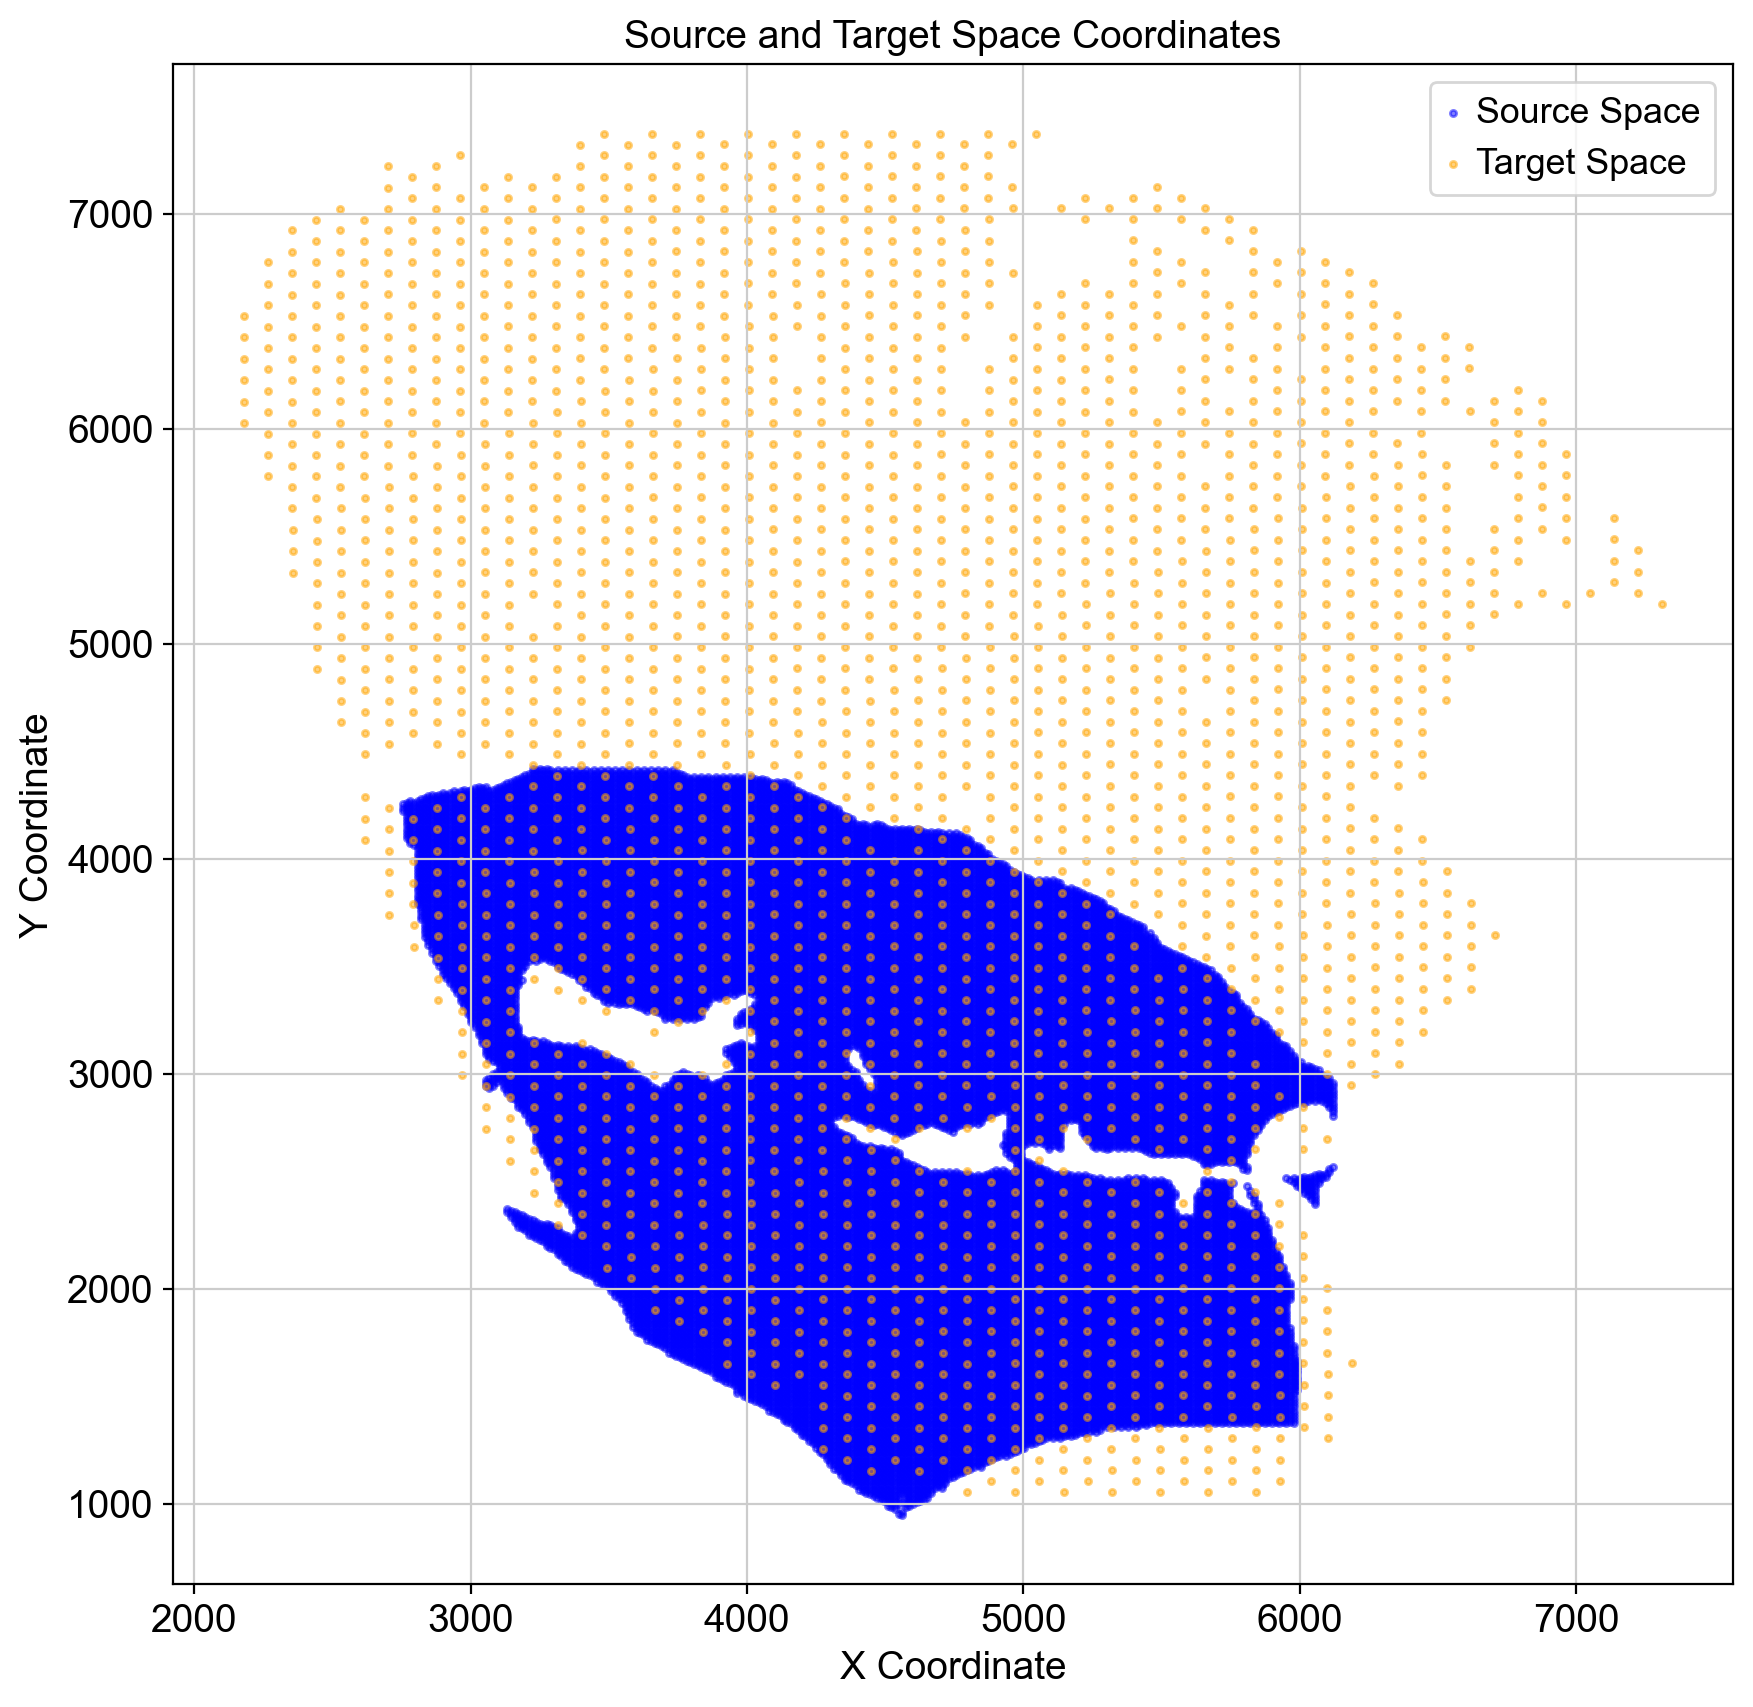

loaded annotation image - annotations_level_0 size - (4310, 4660)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4310, 4660)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4310, 4660)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4310, 4660)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

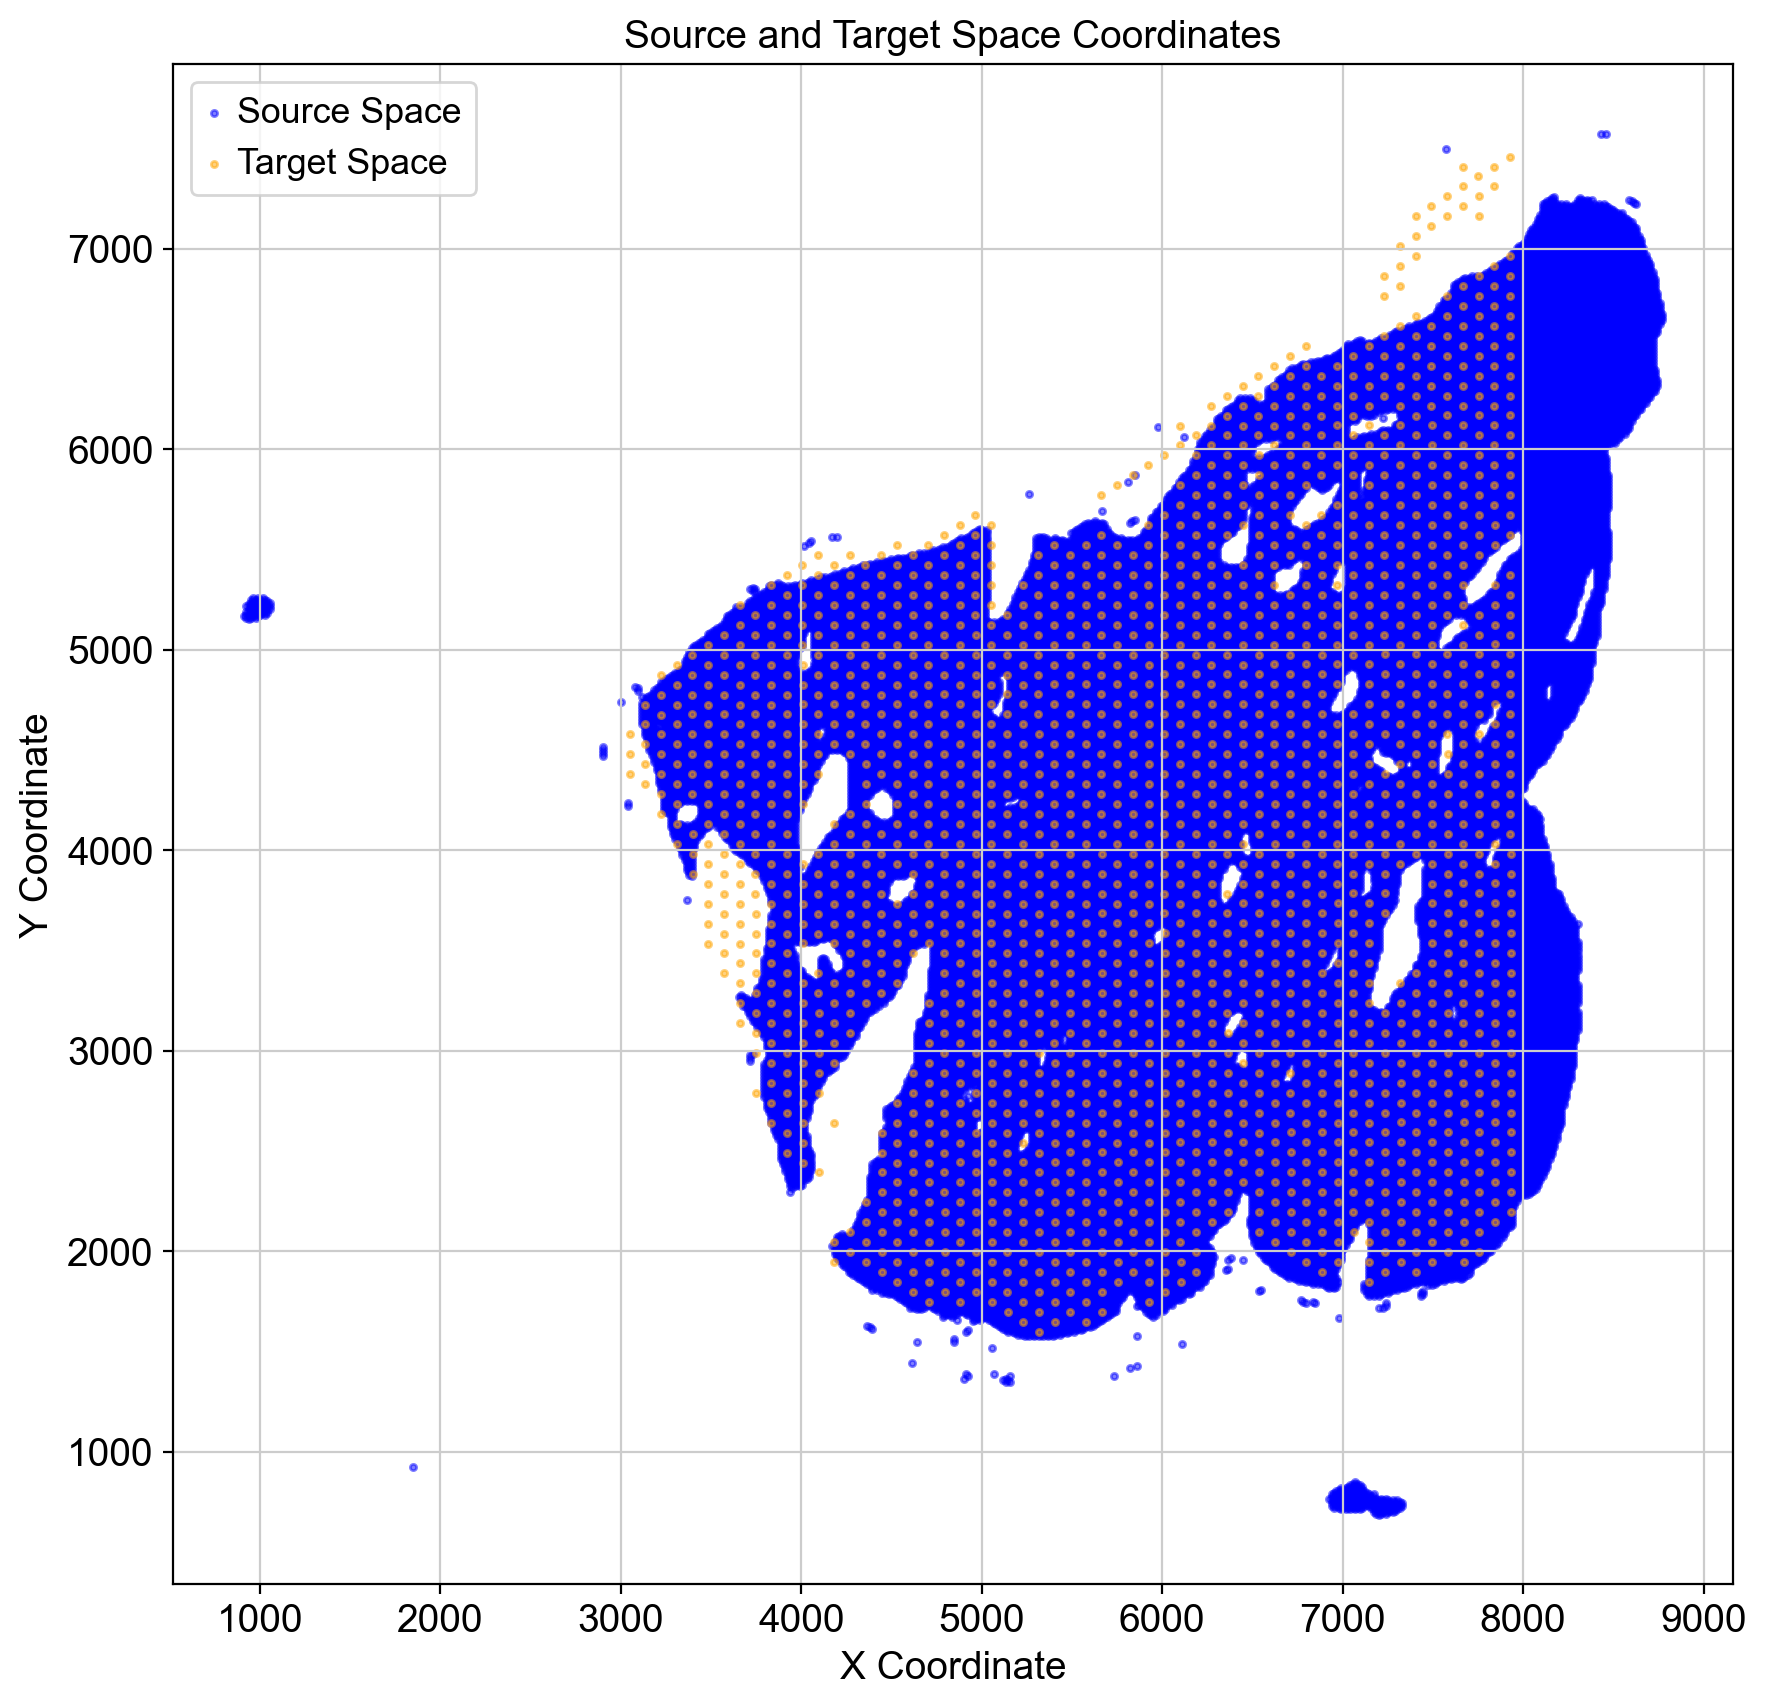

loaded annotation image - annotations_level_0 size - (4251, 4595)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4251, 4595)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4251, 4595)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4251, 4595)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
fat
unassign

<Figure size 960x960 with 0 Axes>

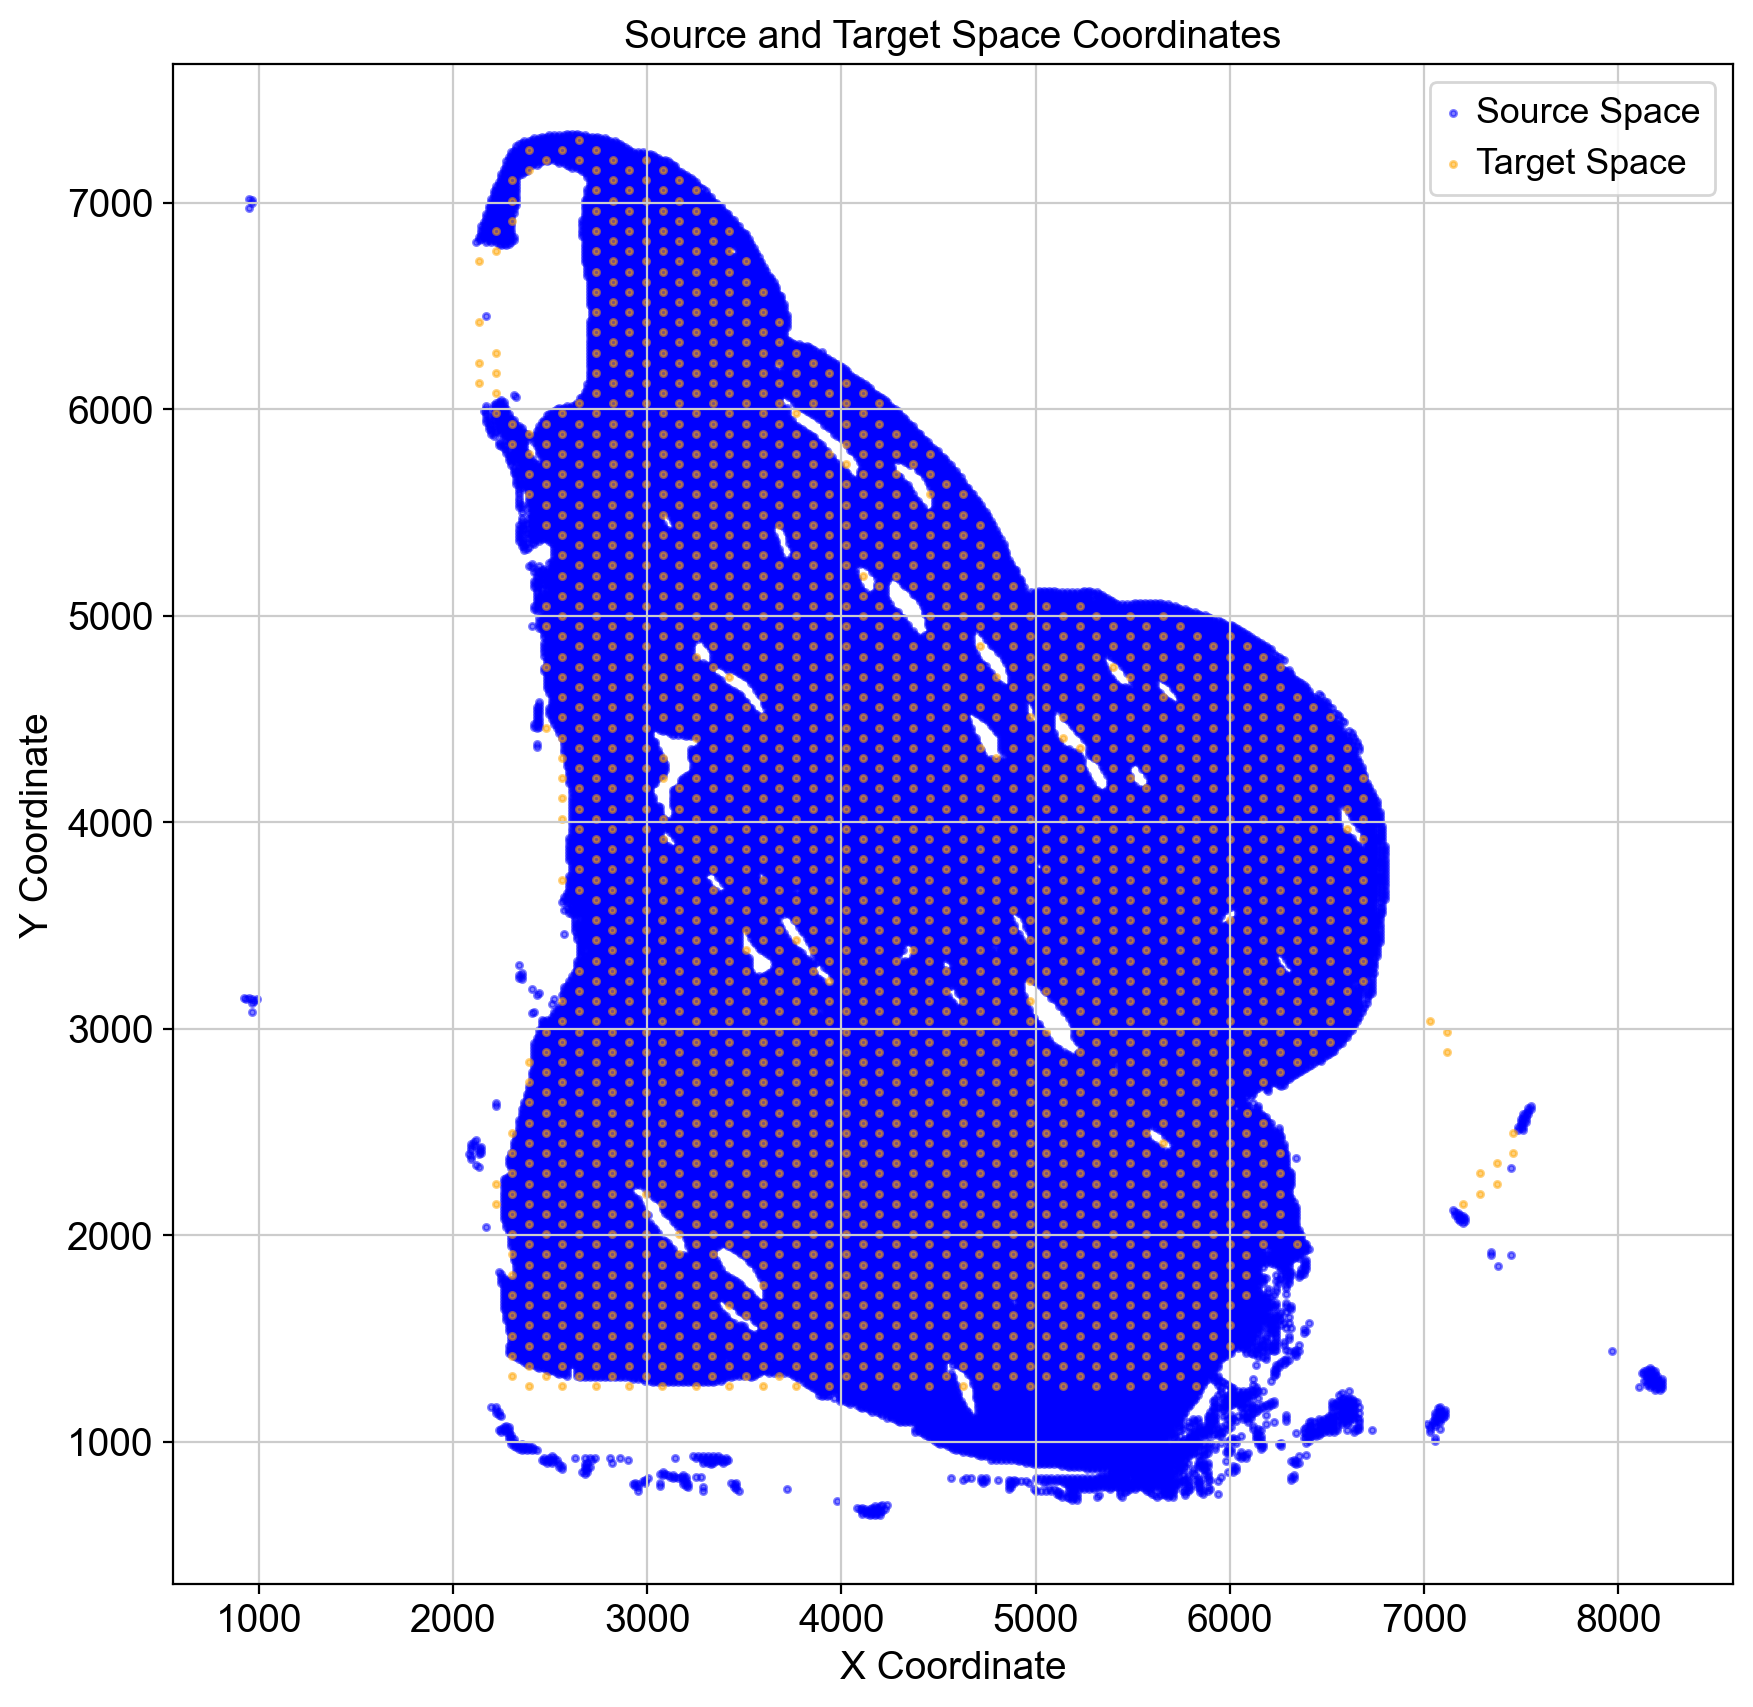

loaded annotation image - annotations_level_0 size - (4325, 4644)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4325, 4644)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4325, 4644)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4325, 4644)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

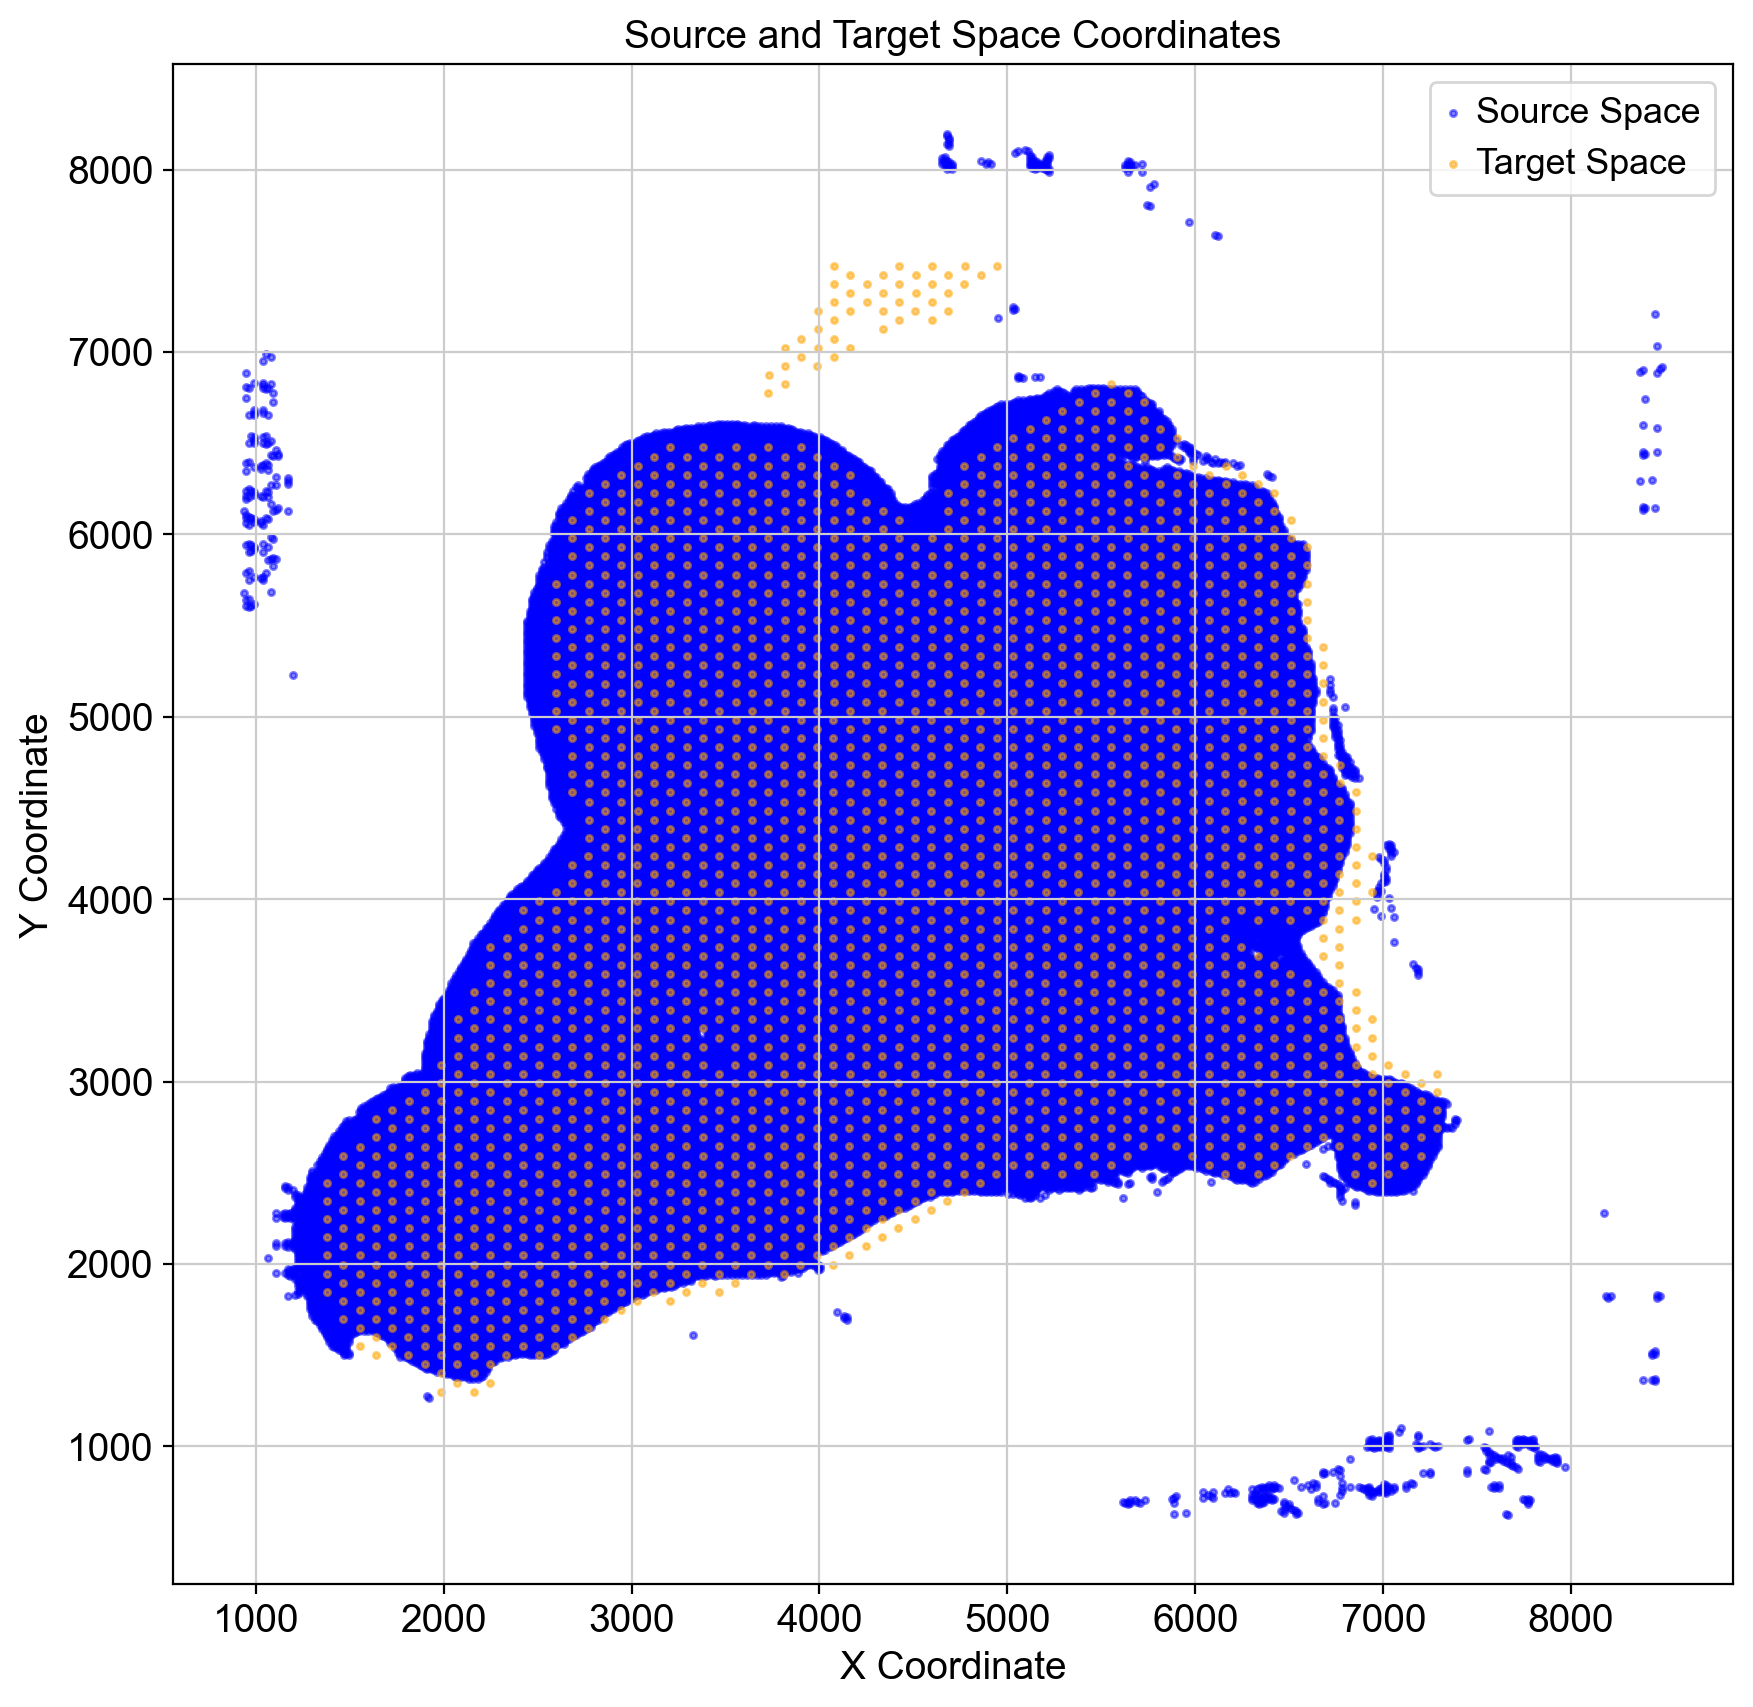

loaded annotation image - annotations_level_0 size - (4308, 4657)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4308, 4657)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4308, 4657)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4308, 4657)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

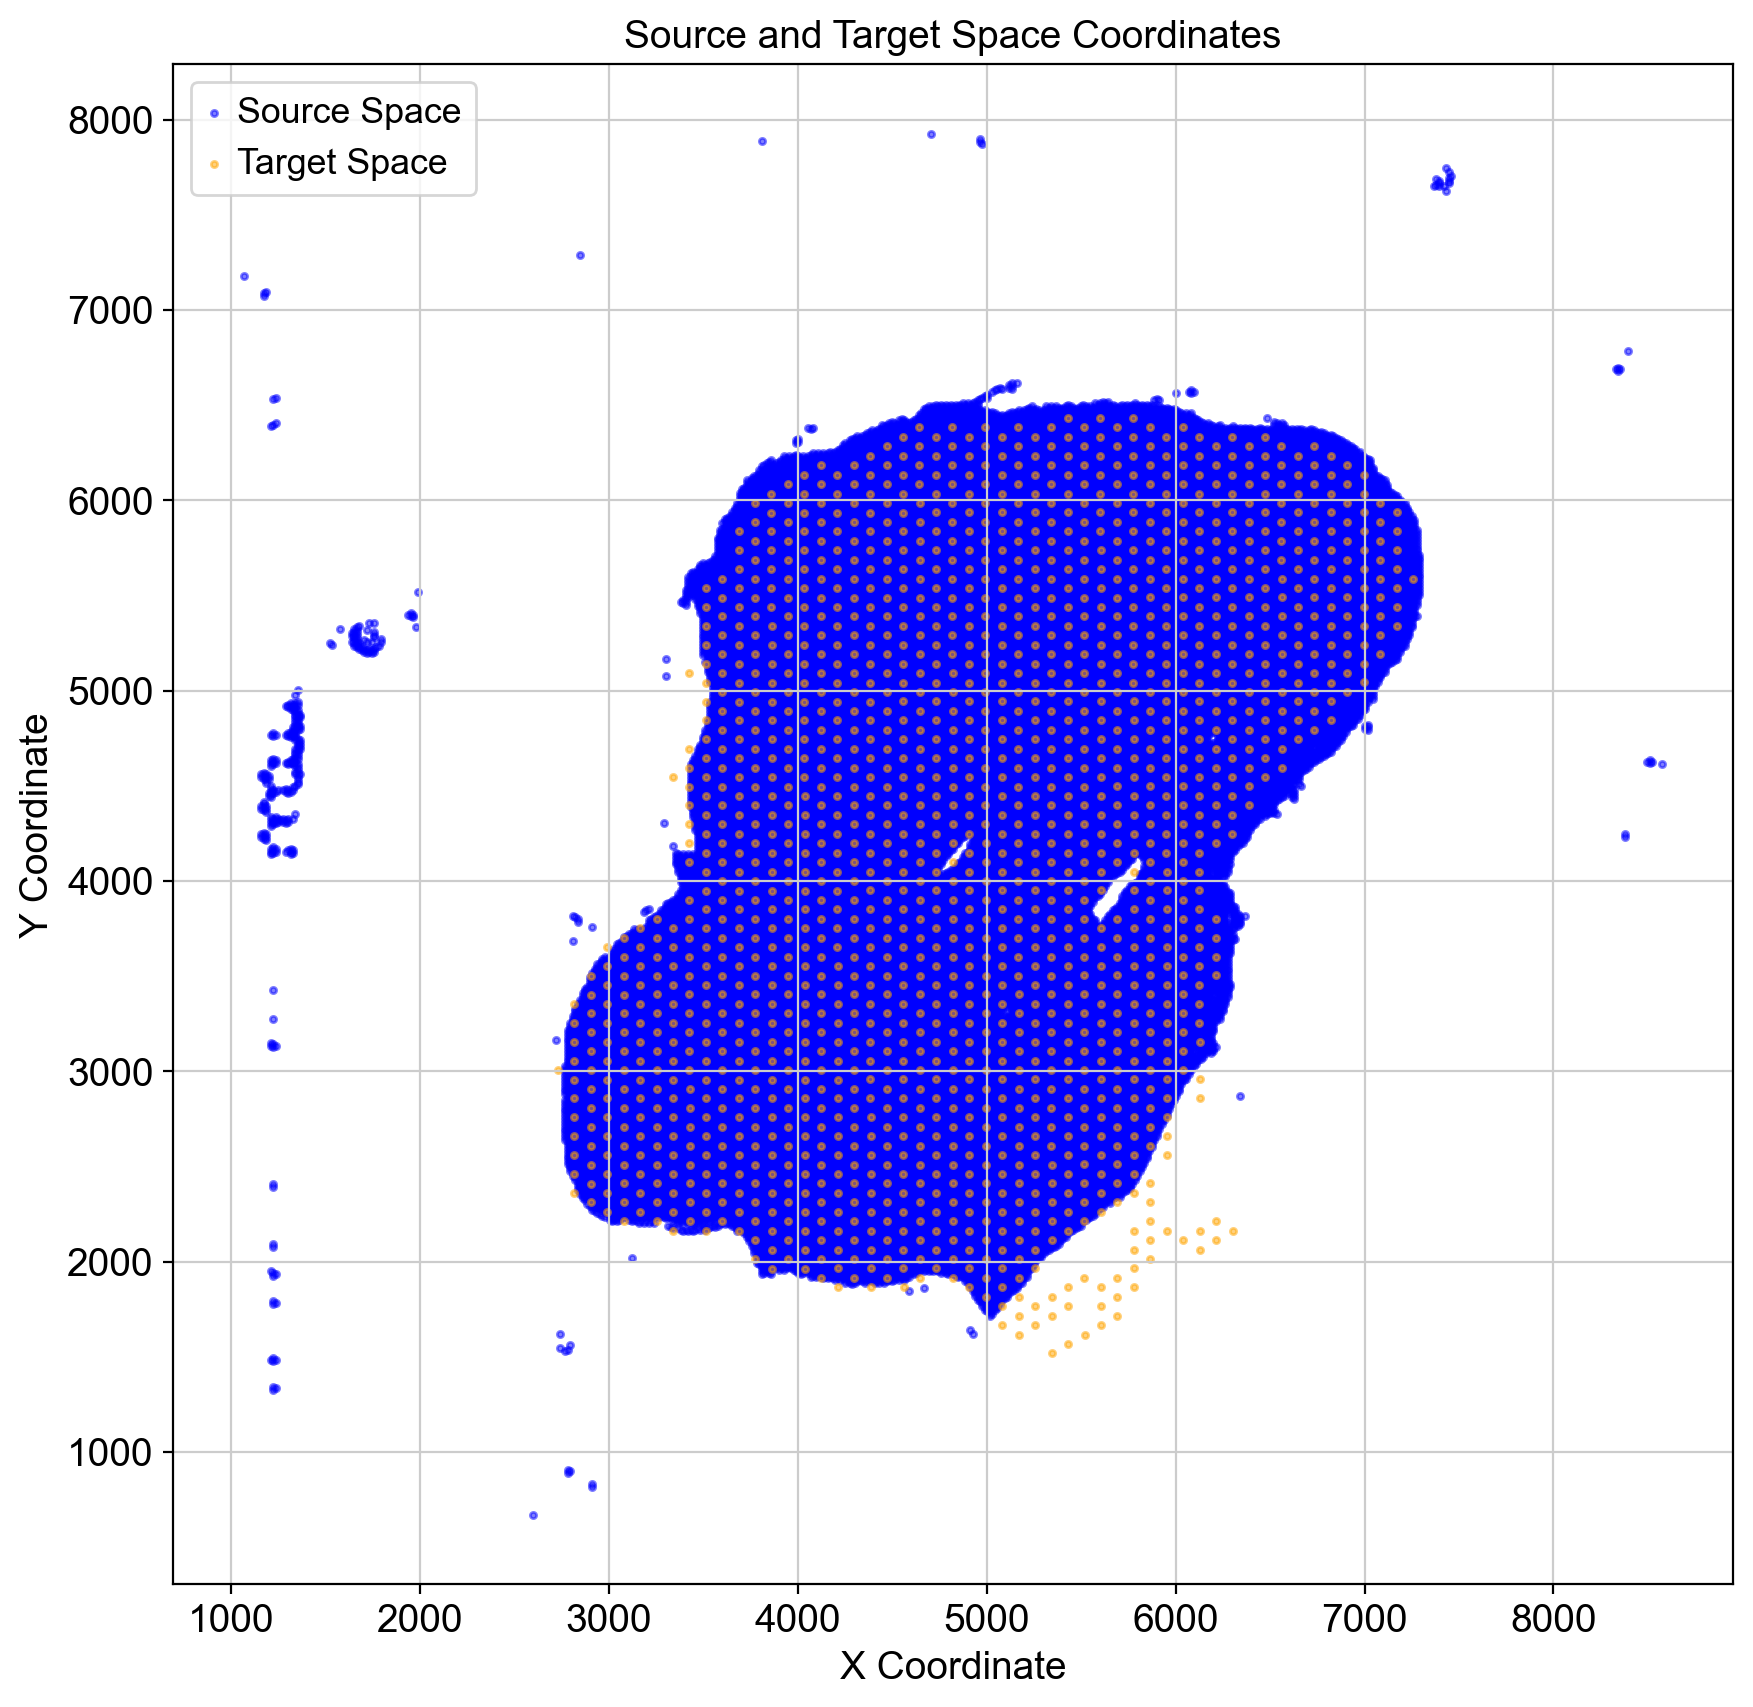

loaded annotation image - annotations_level_0 size - (4306, 4655)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4306, 4655)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4306, 4655)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4306, 4655)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

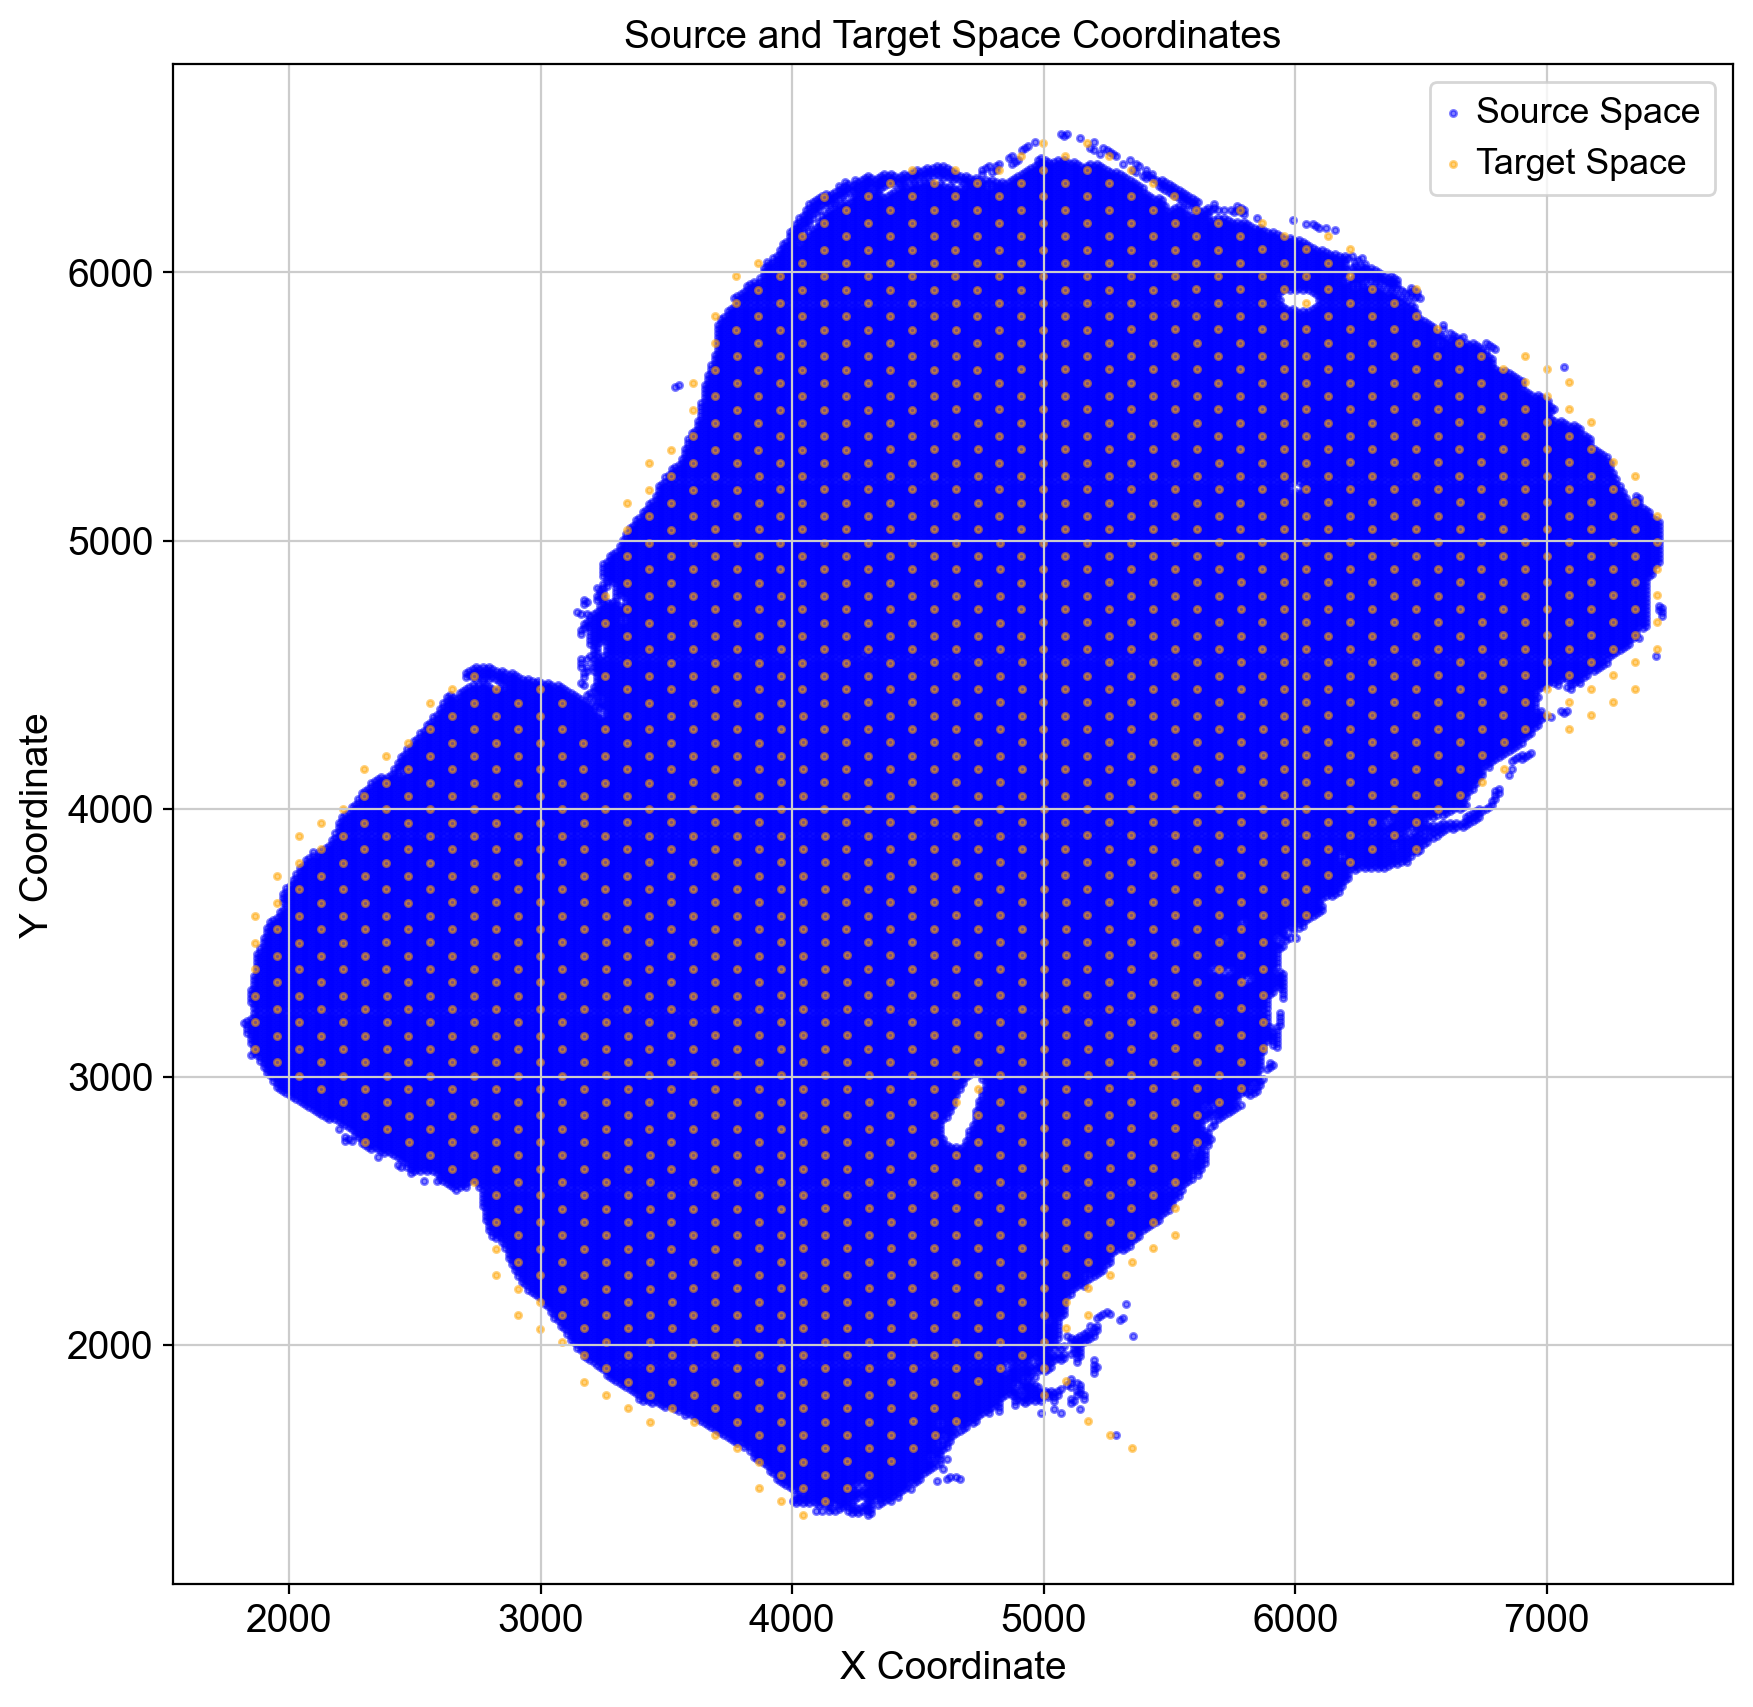

loaded annotation image - annotations_level_0 size - (4211, 4523)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4211, 4523)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4211, 4523)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4211, 4523)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

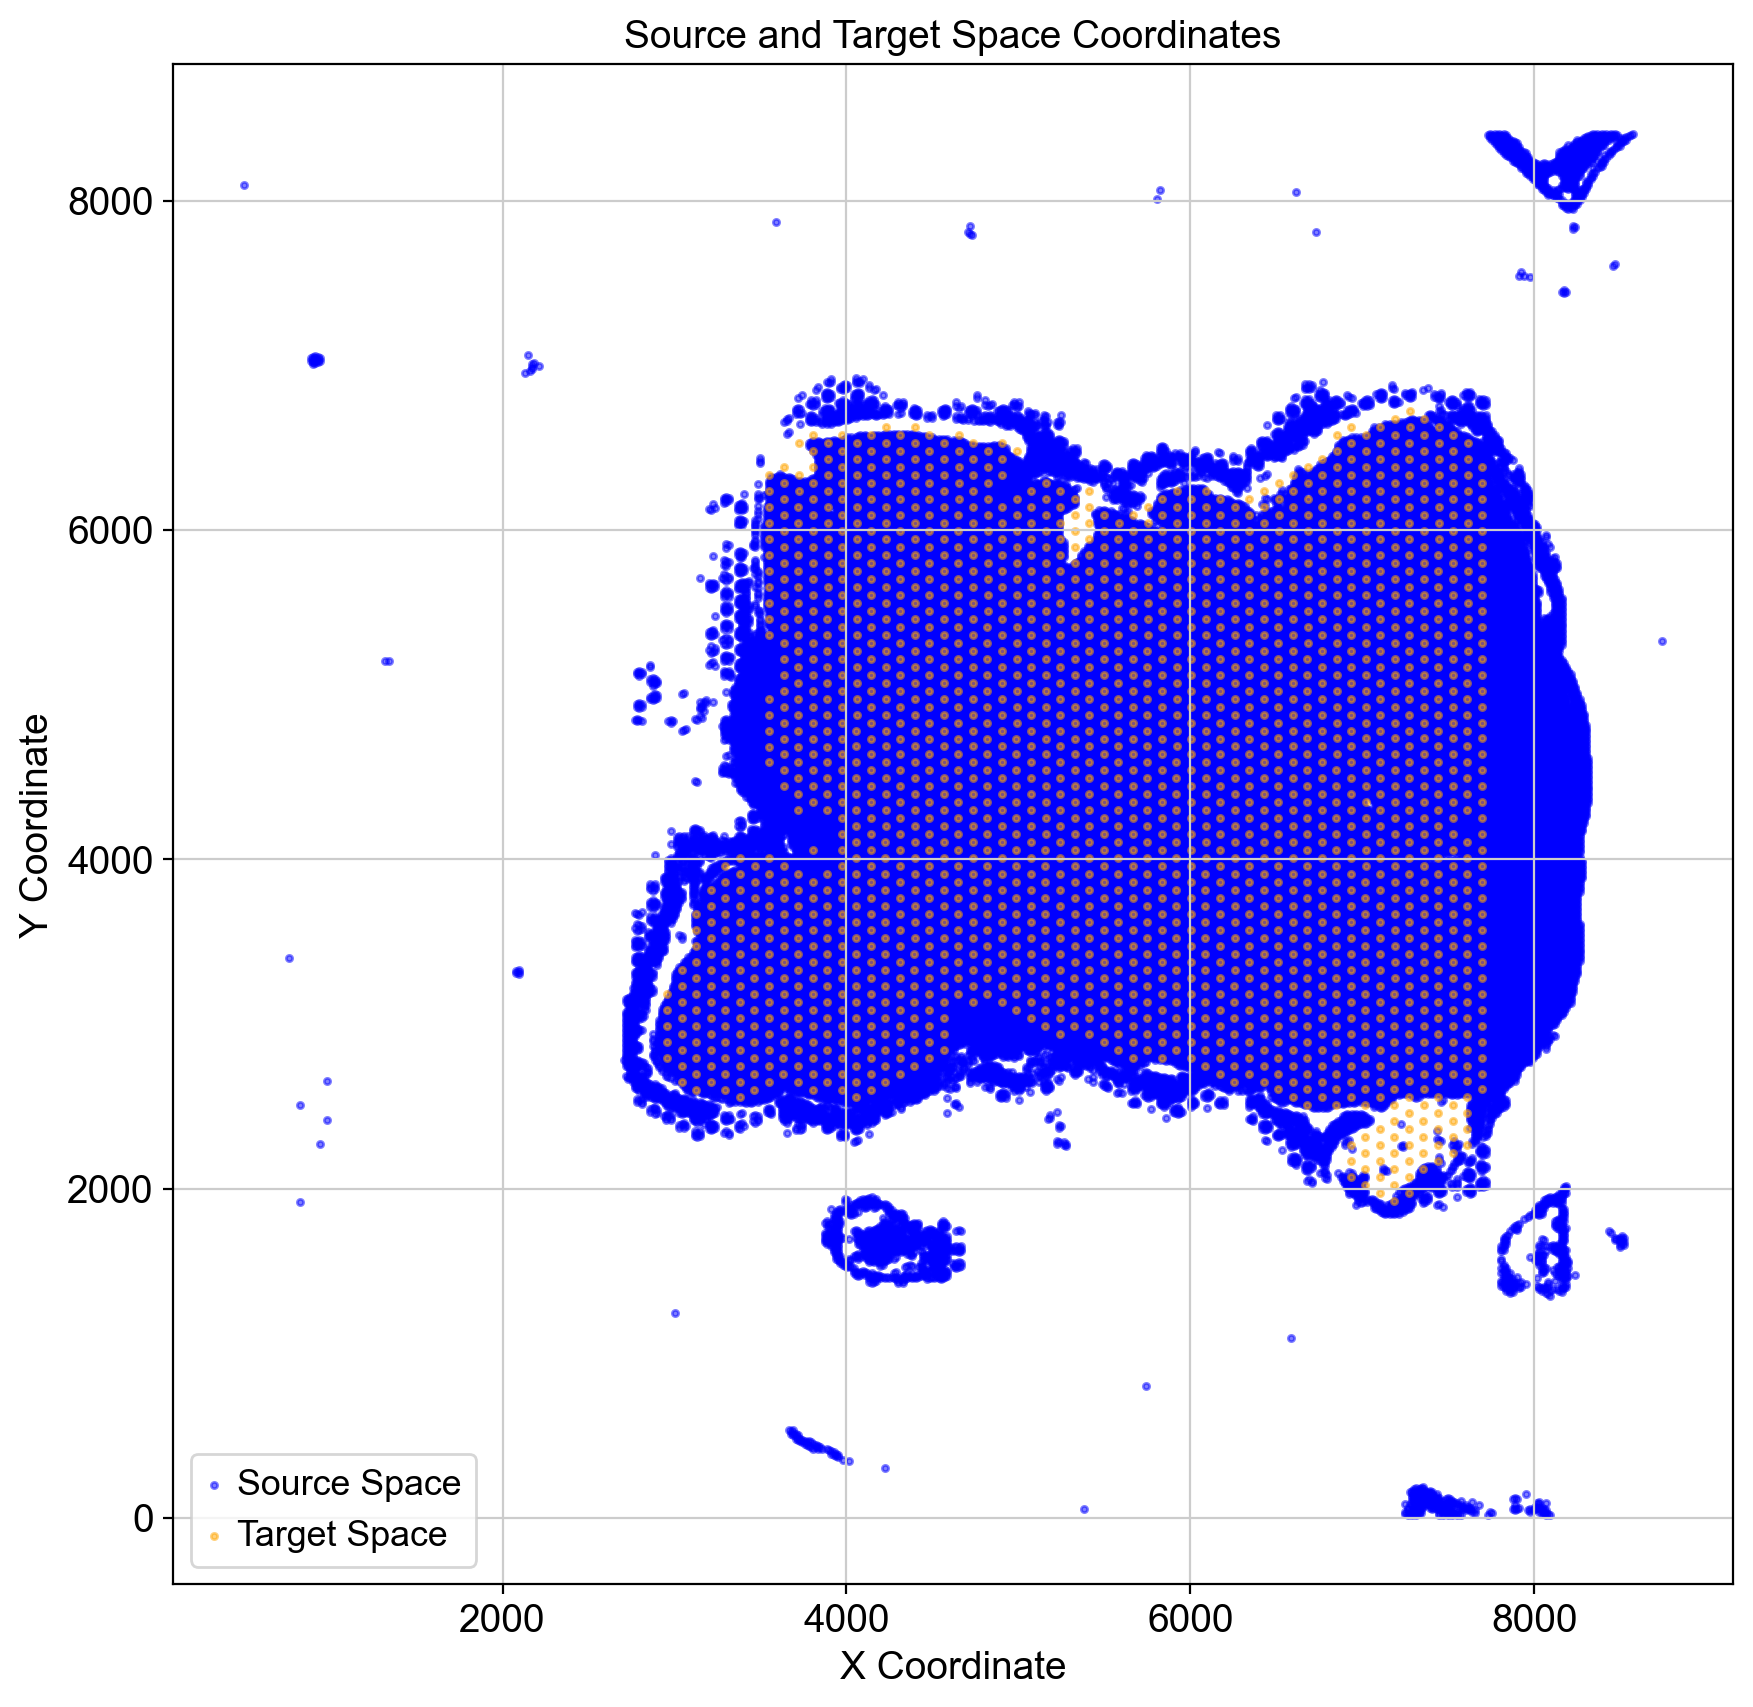

loaded annotation image - annotations_level_0 size - (4326, 4646)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4326, 4646)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4326, 4646)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4326, 4646)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

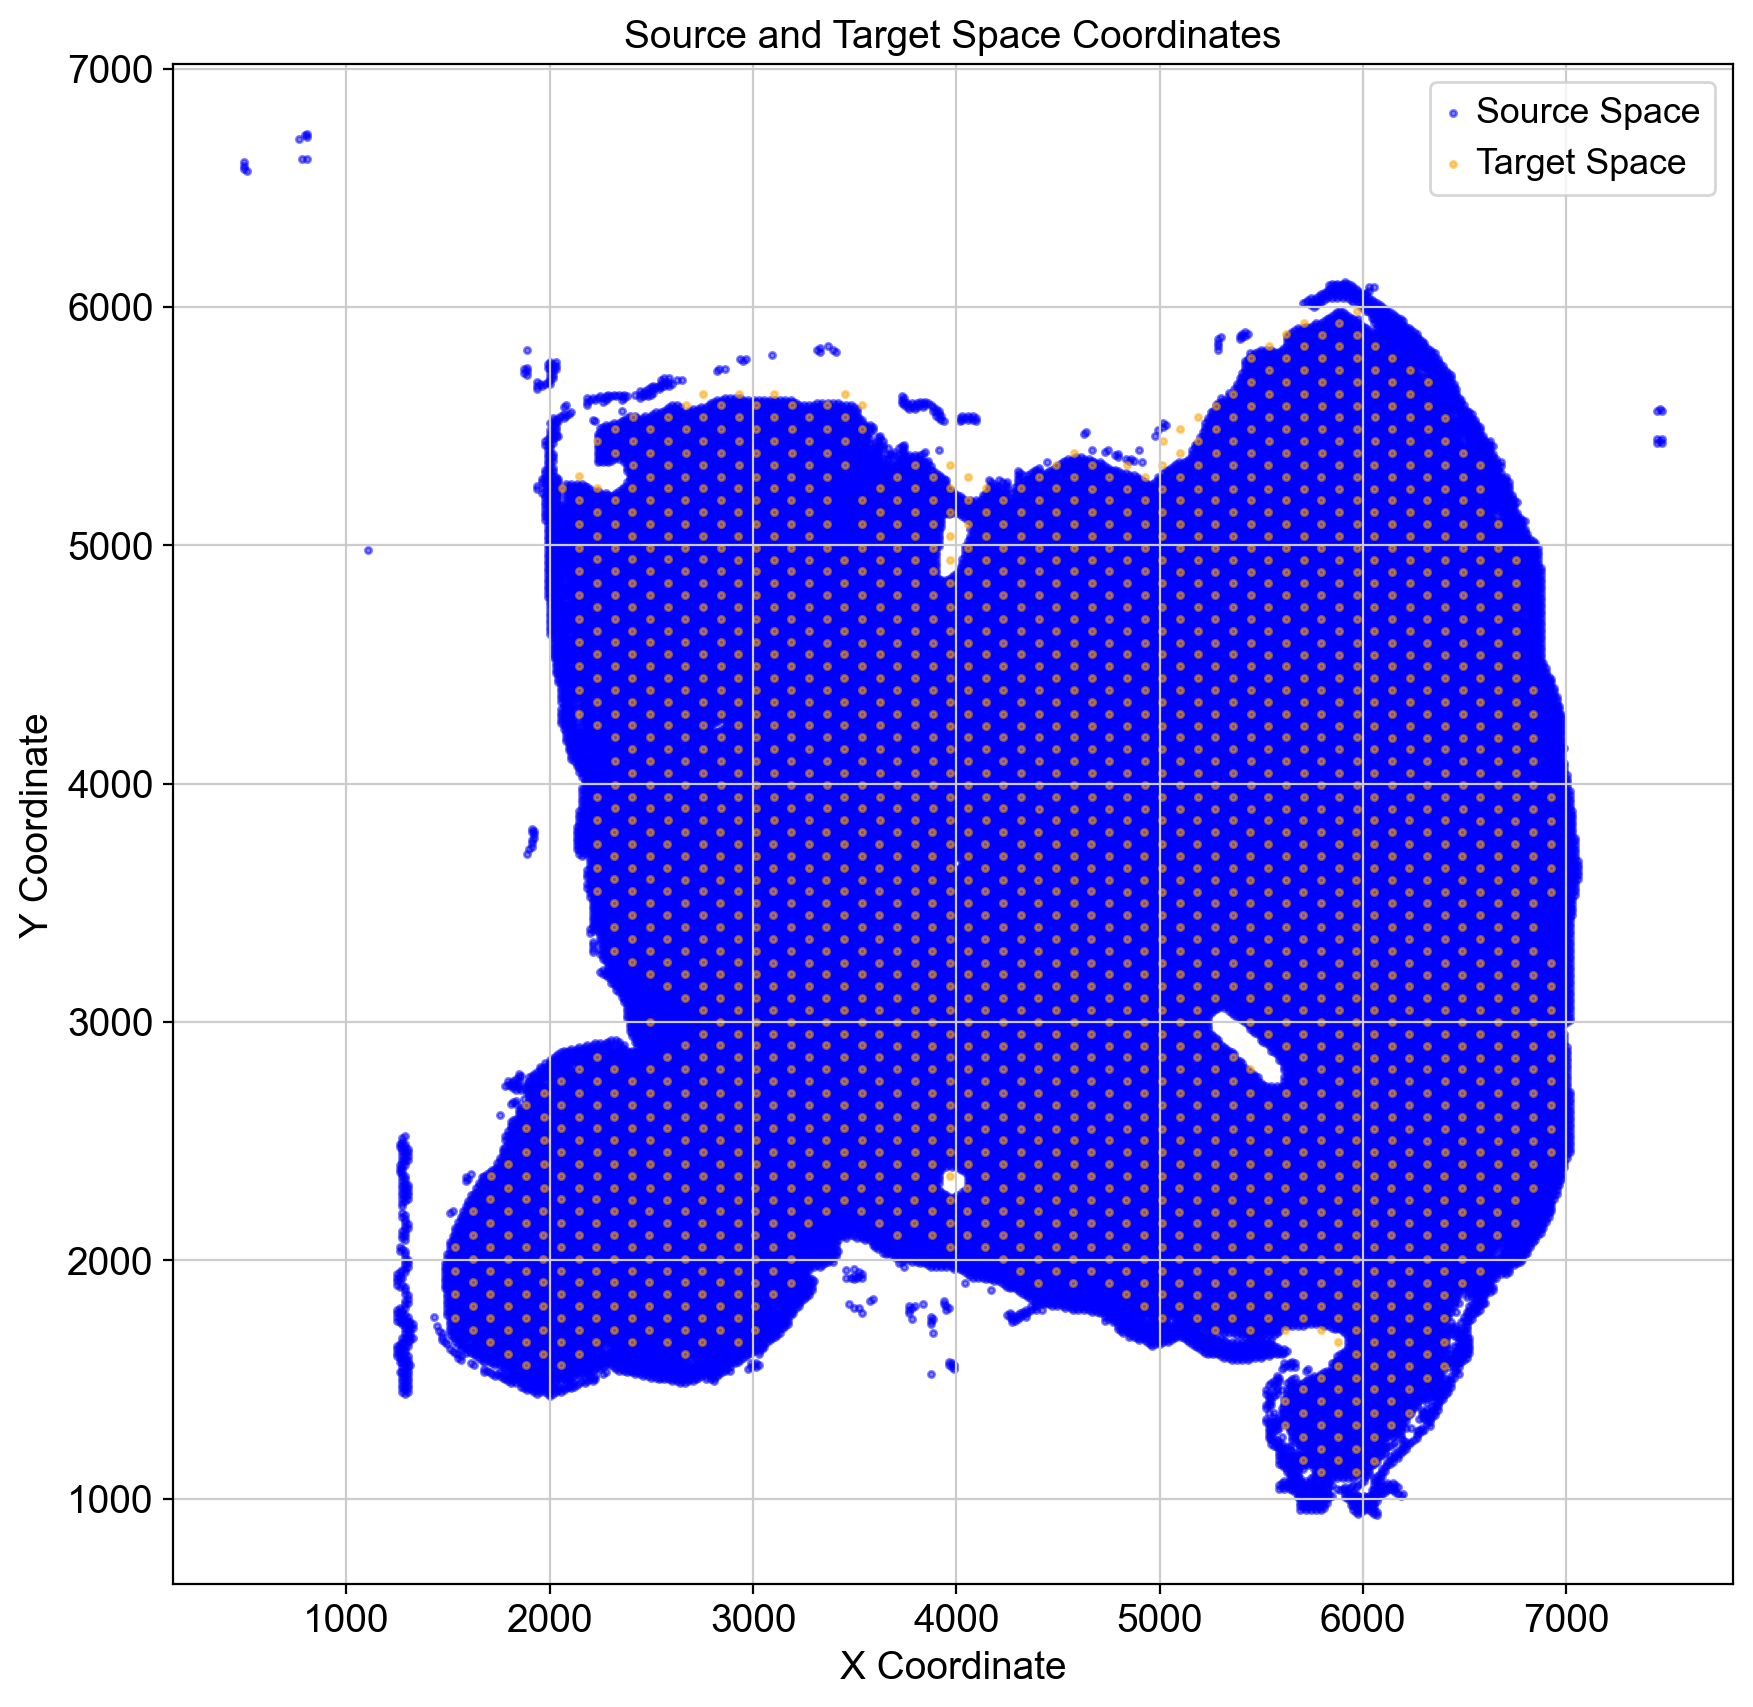

loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

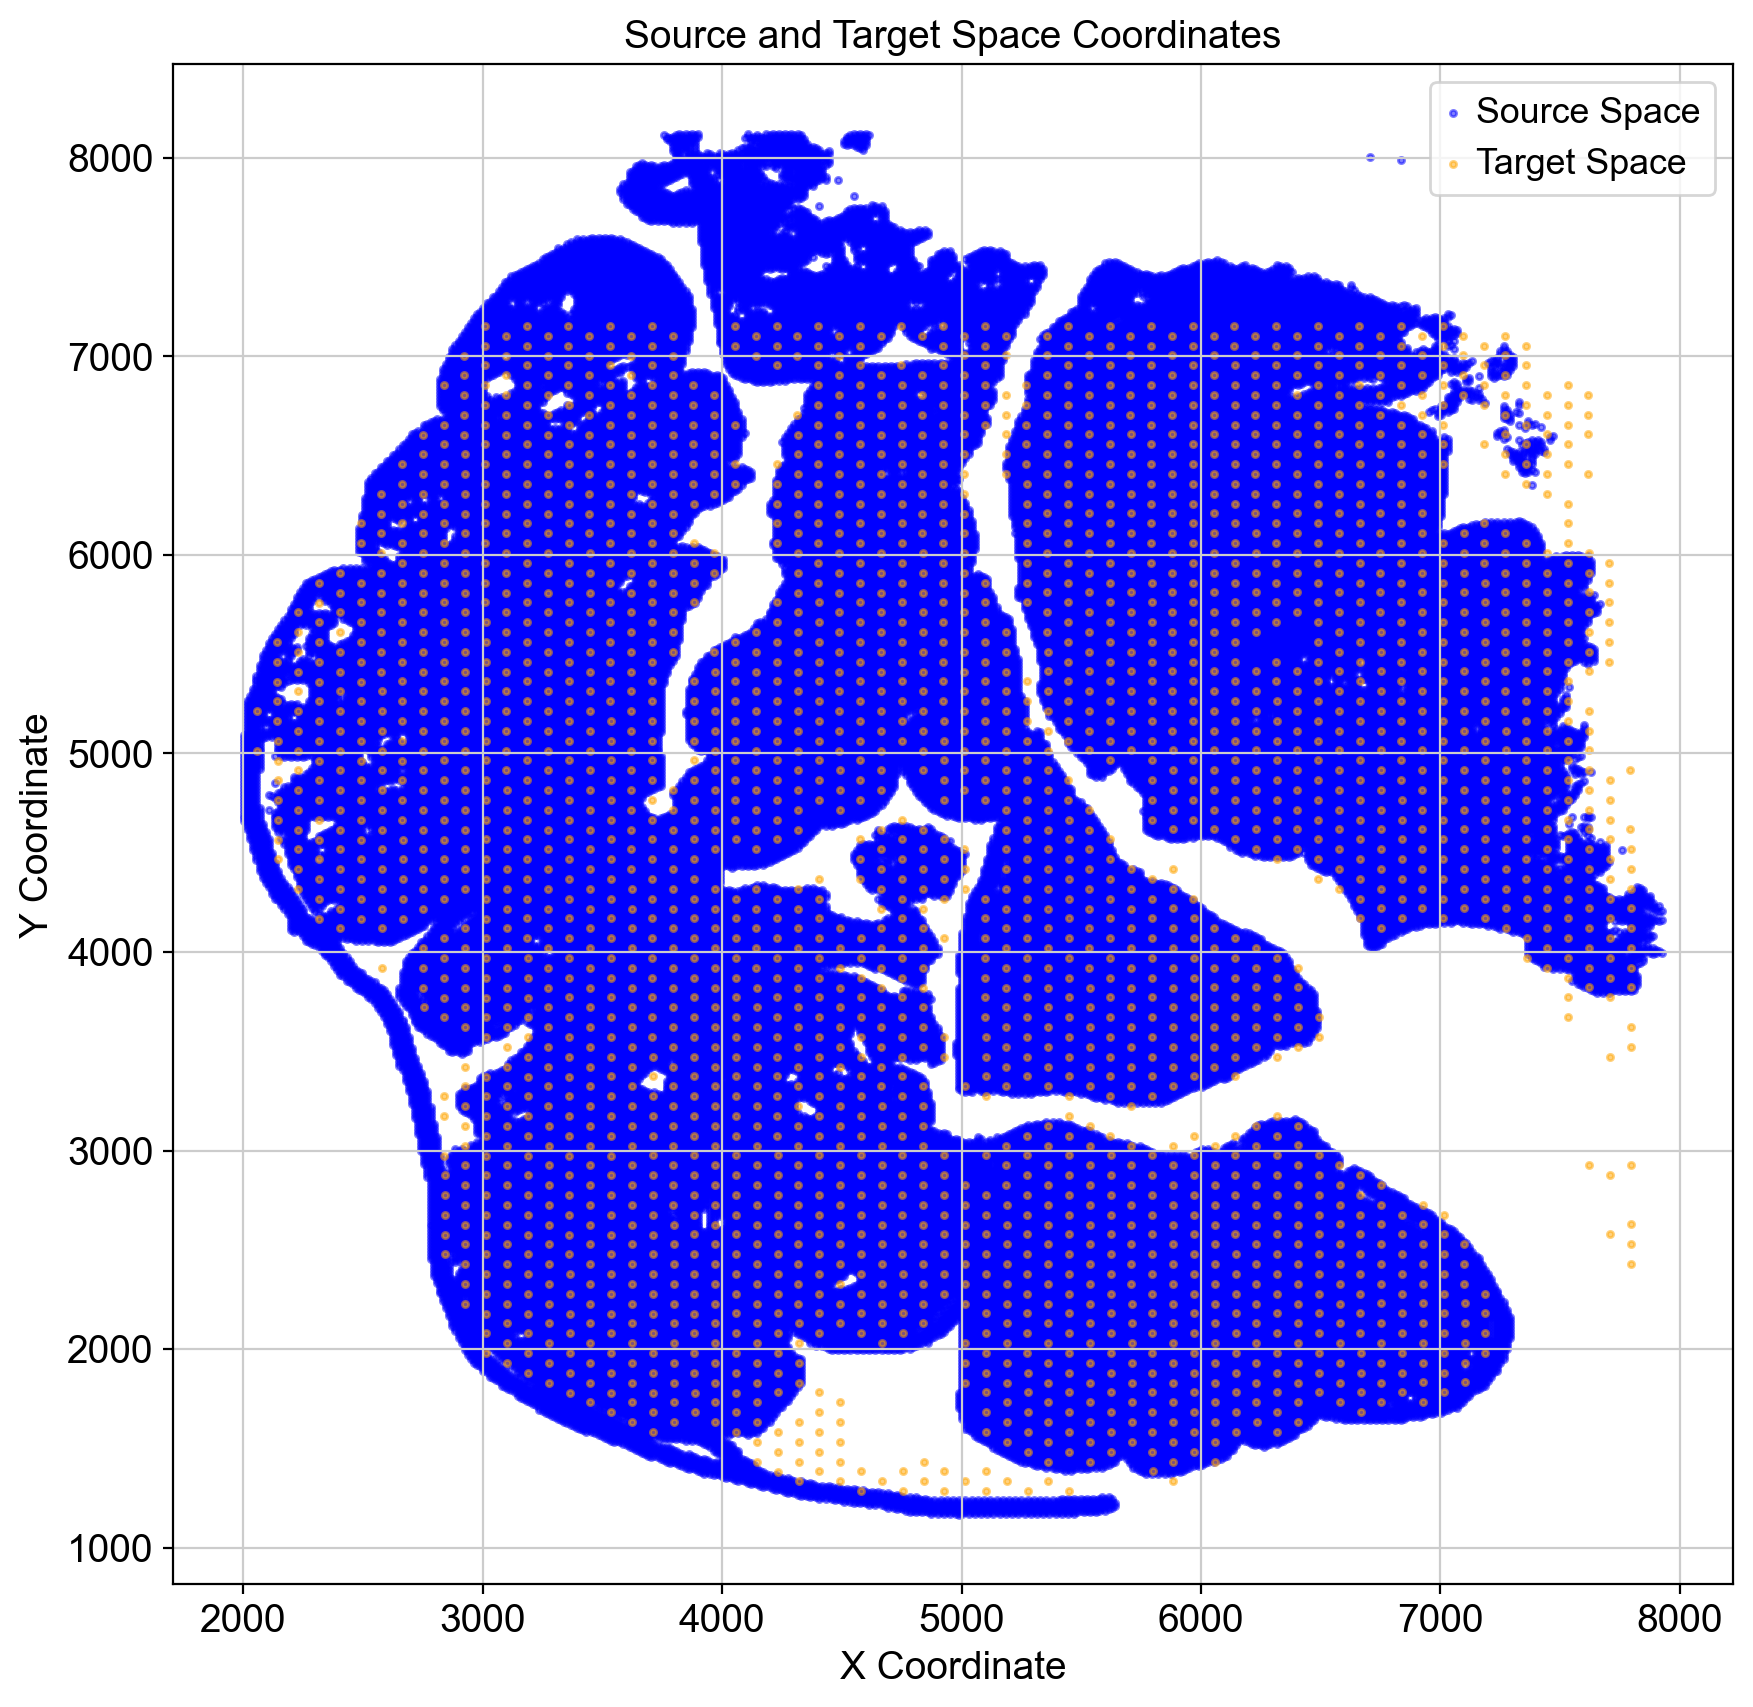

loaded annotation image - annotations_level_0 size - (4300, 4183)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4300, 4183)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4300, 4183)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4300, 4183)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with cKDTree
HS
PVS
unassigned


<Figure size 960x960 with 0 Axes>

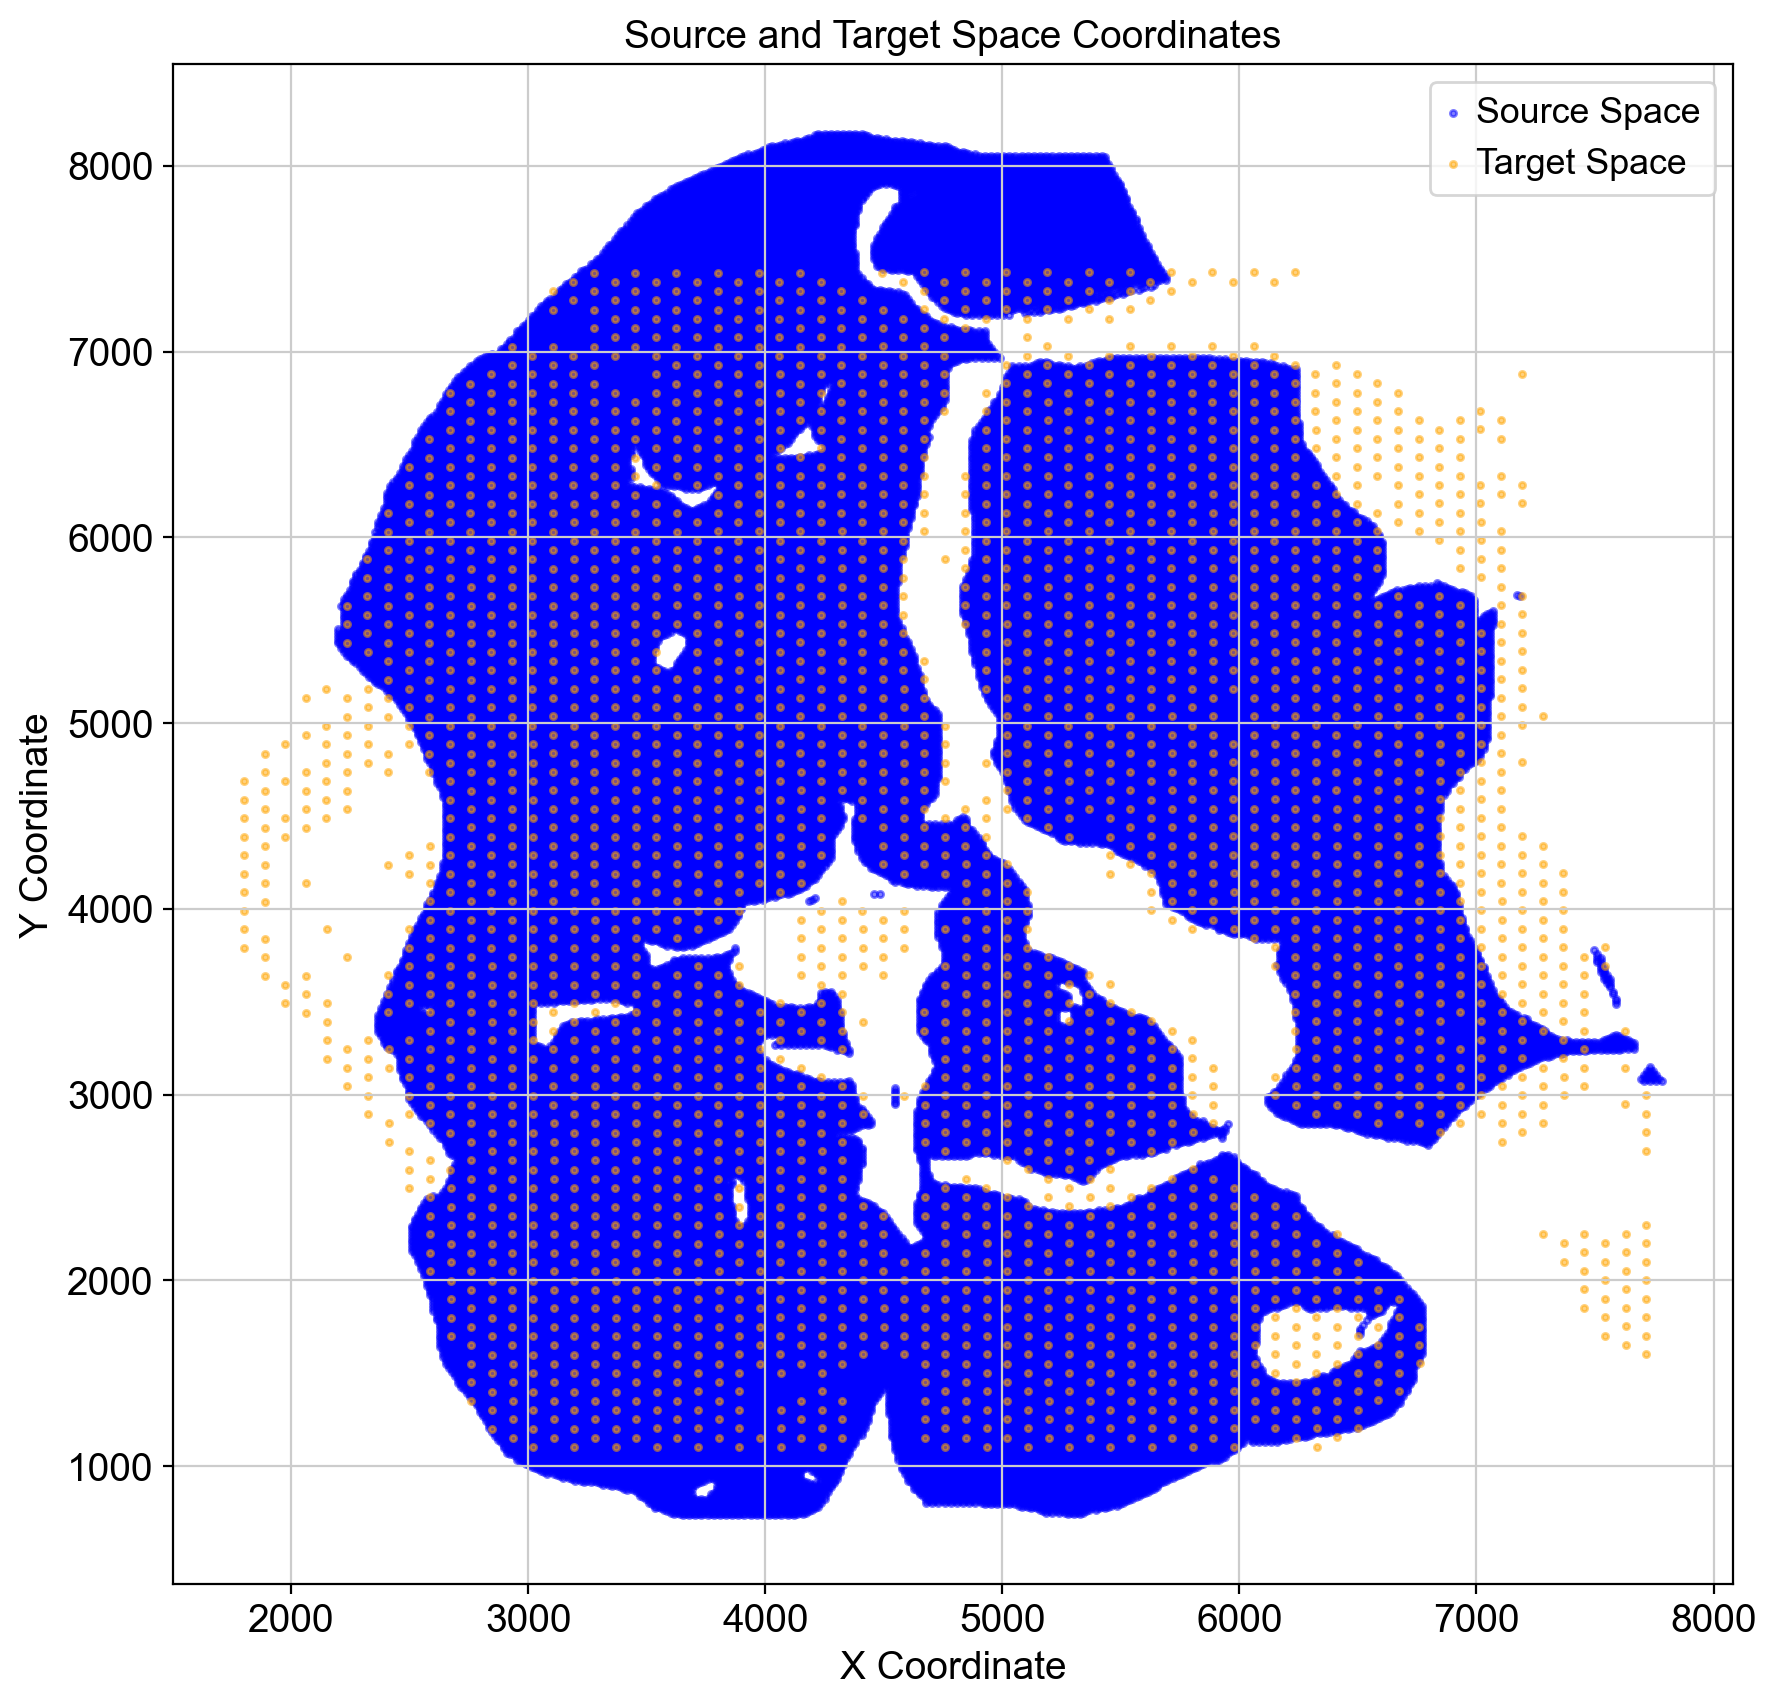

loaded annotation image - annotations_level_0 size - (4064, 4645)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4064, 4645)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4064, 4645)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4064, 4645)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'vessels', 5: 'fat'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

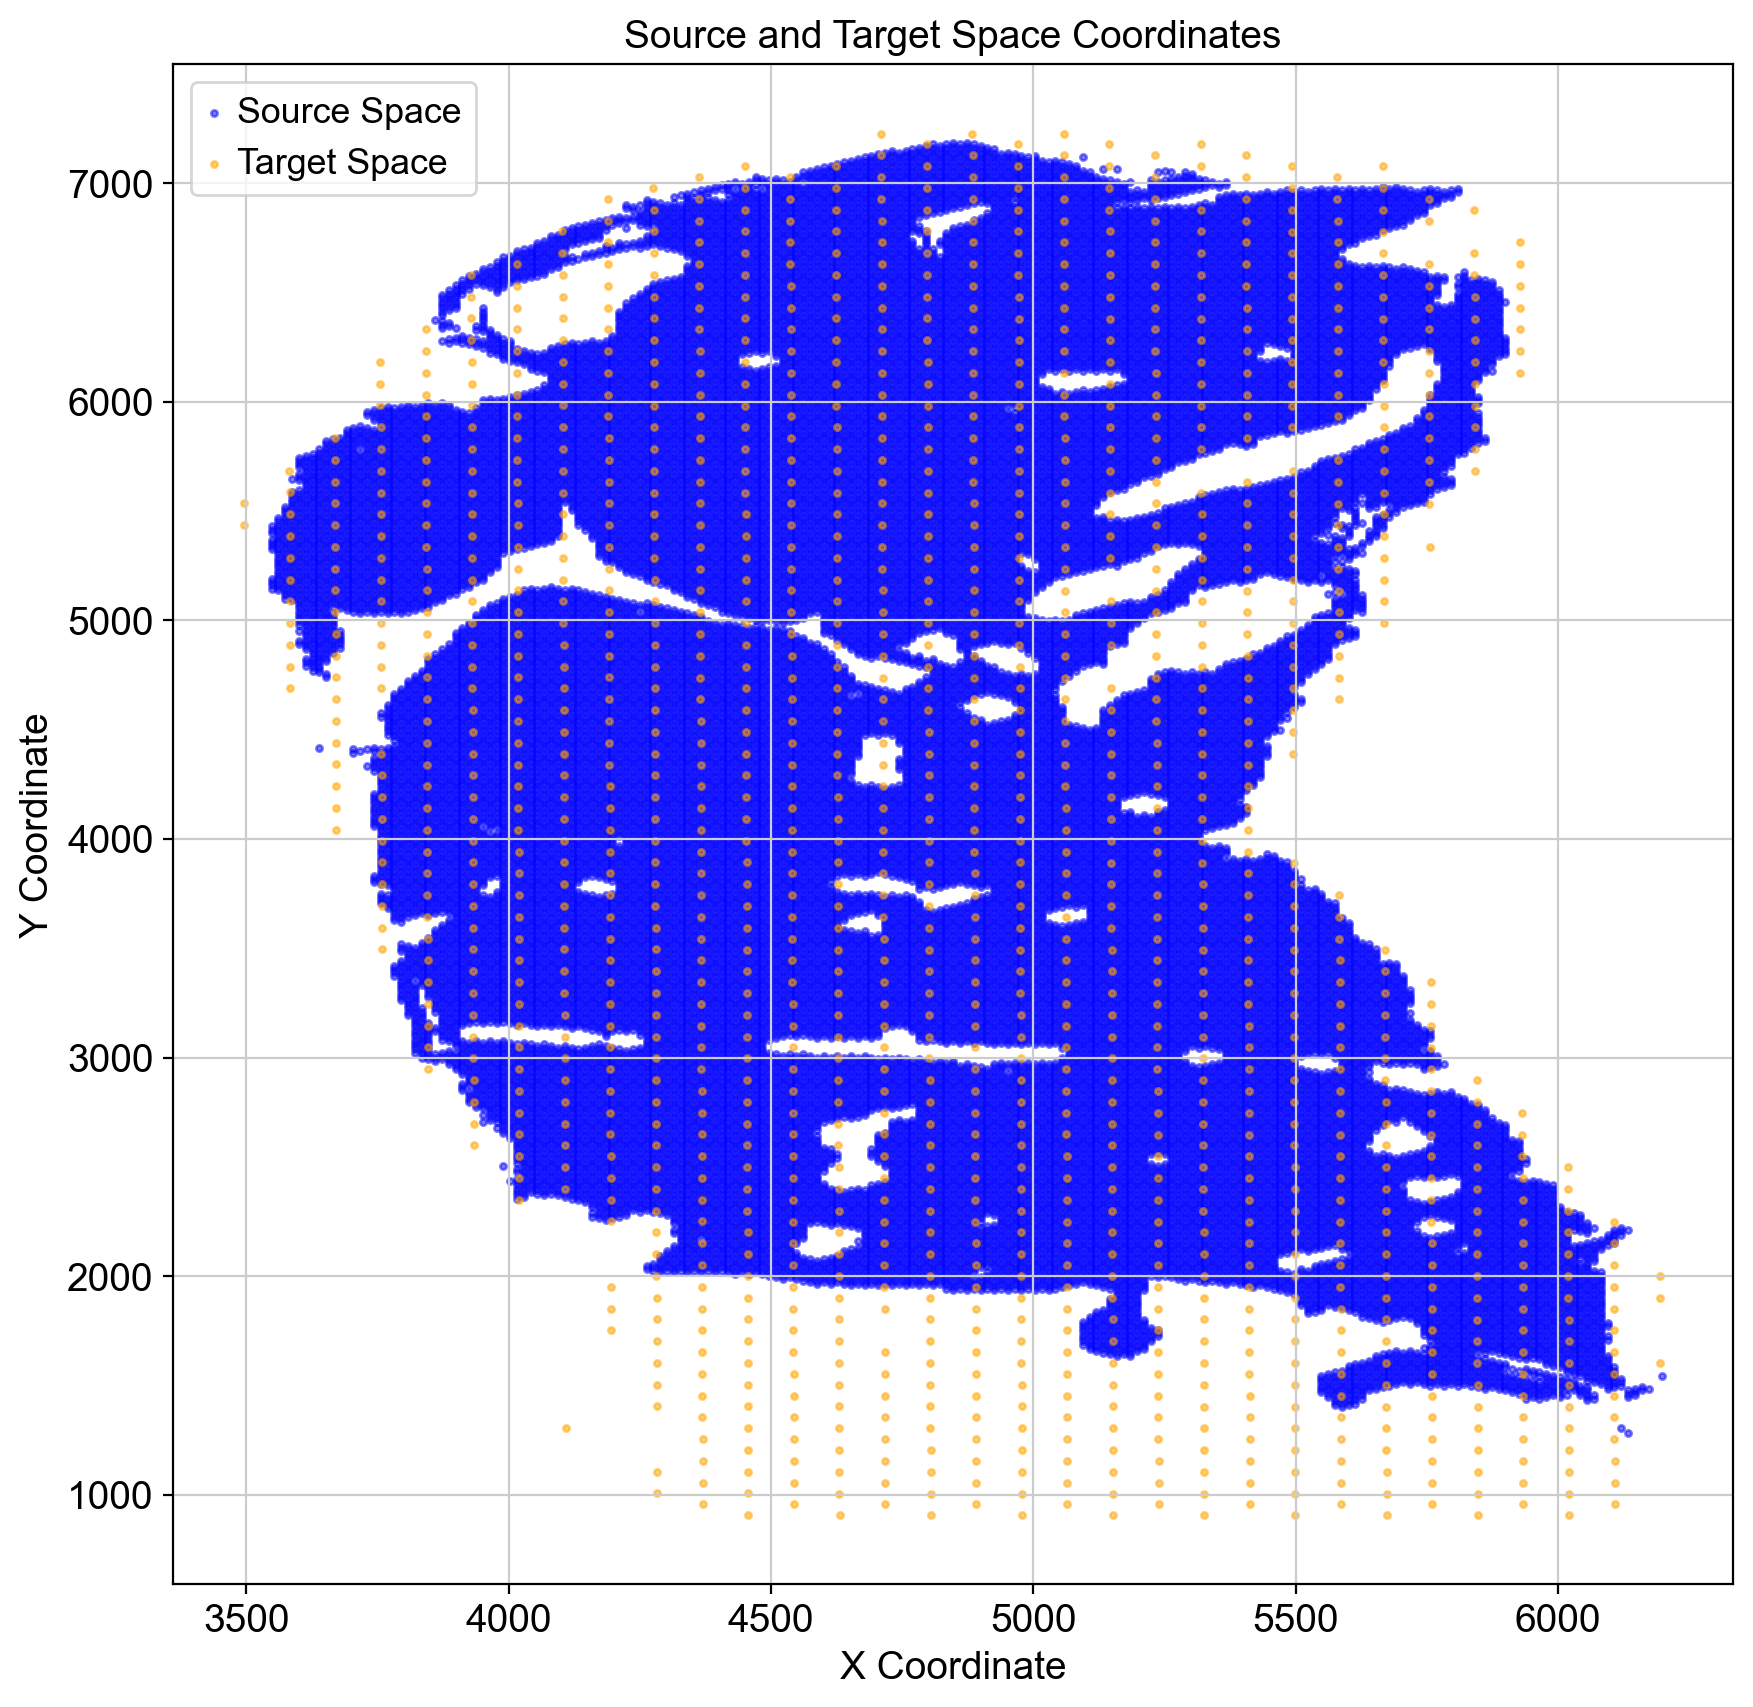

loaded annotation image - annotations_level_0 size - (4123, 4181)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4123, 4181)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4123, 4181)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4123, 4181)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

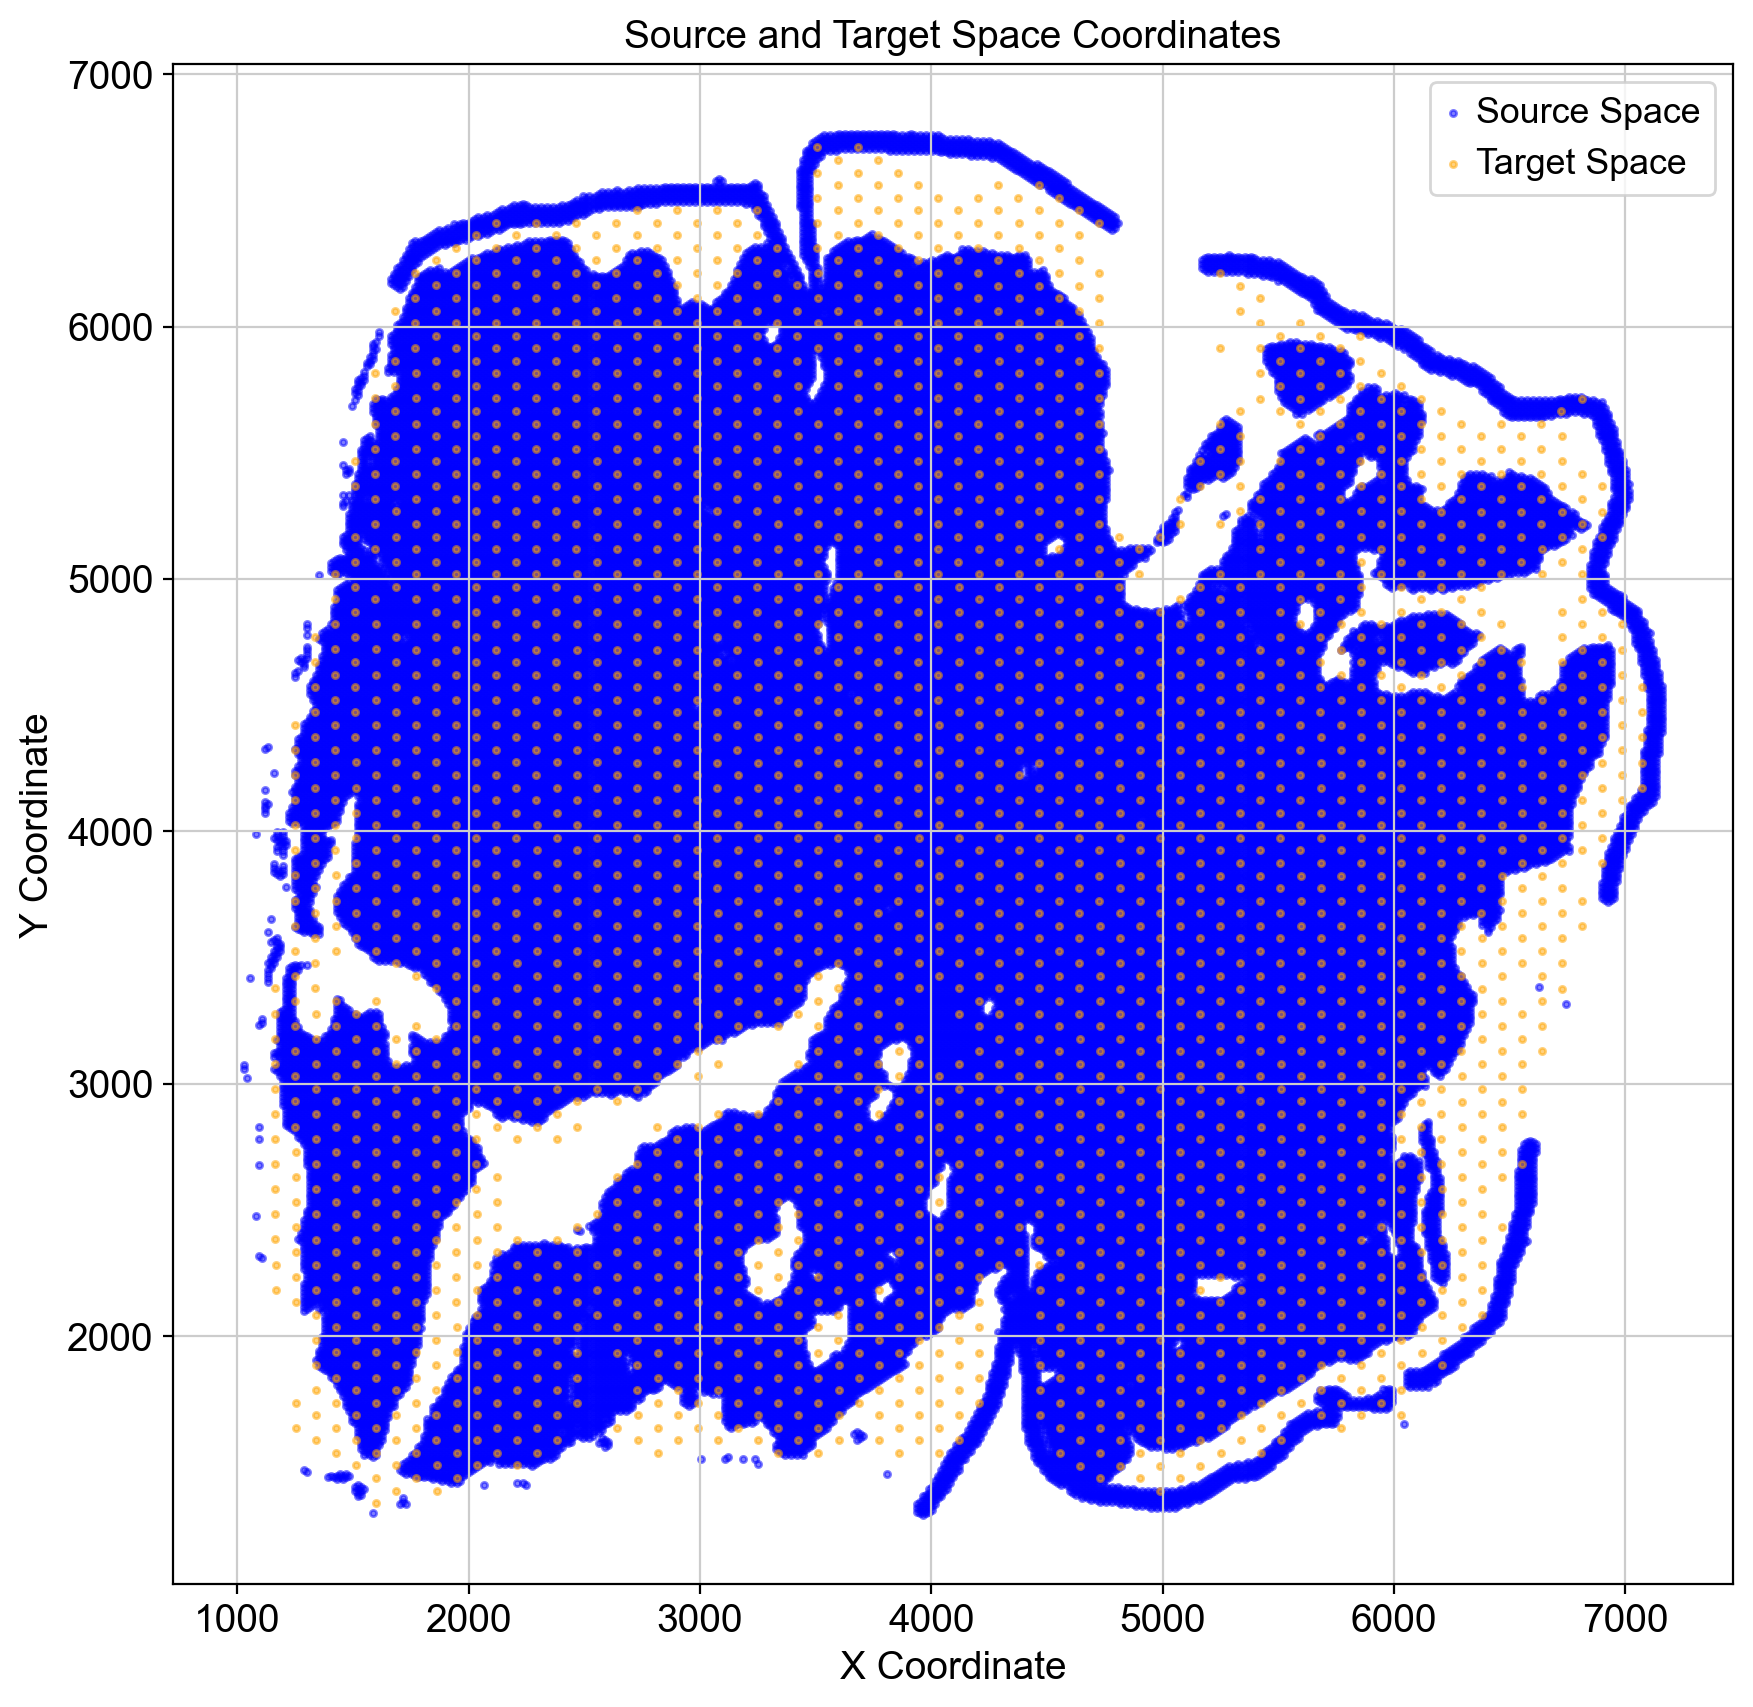

loaded annotation image - annotations_level_0 size - (4122, 4645)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4122, 4645)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4122, 4645)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4122, 4645)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

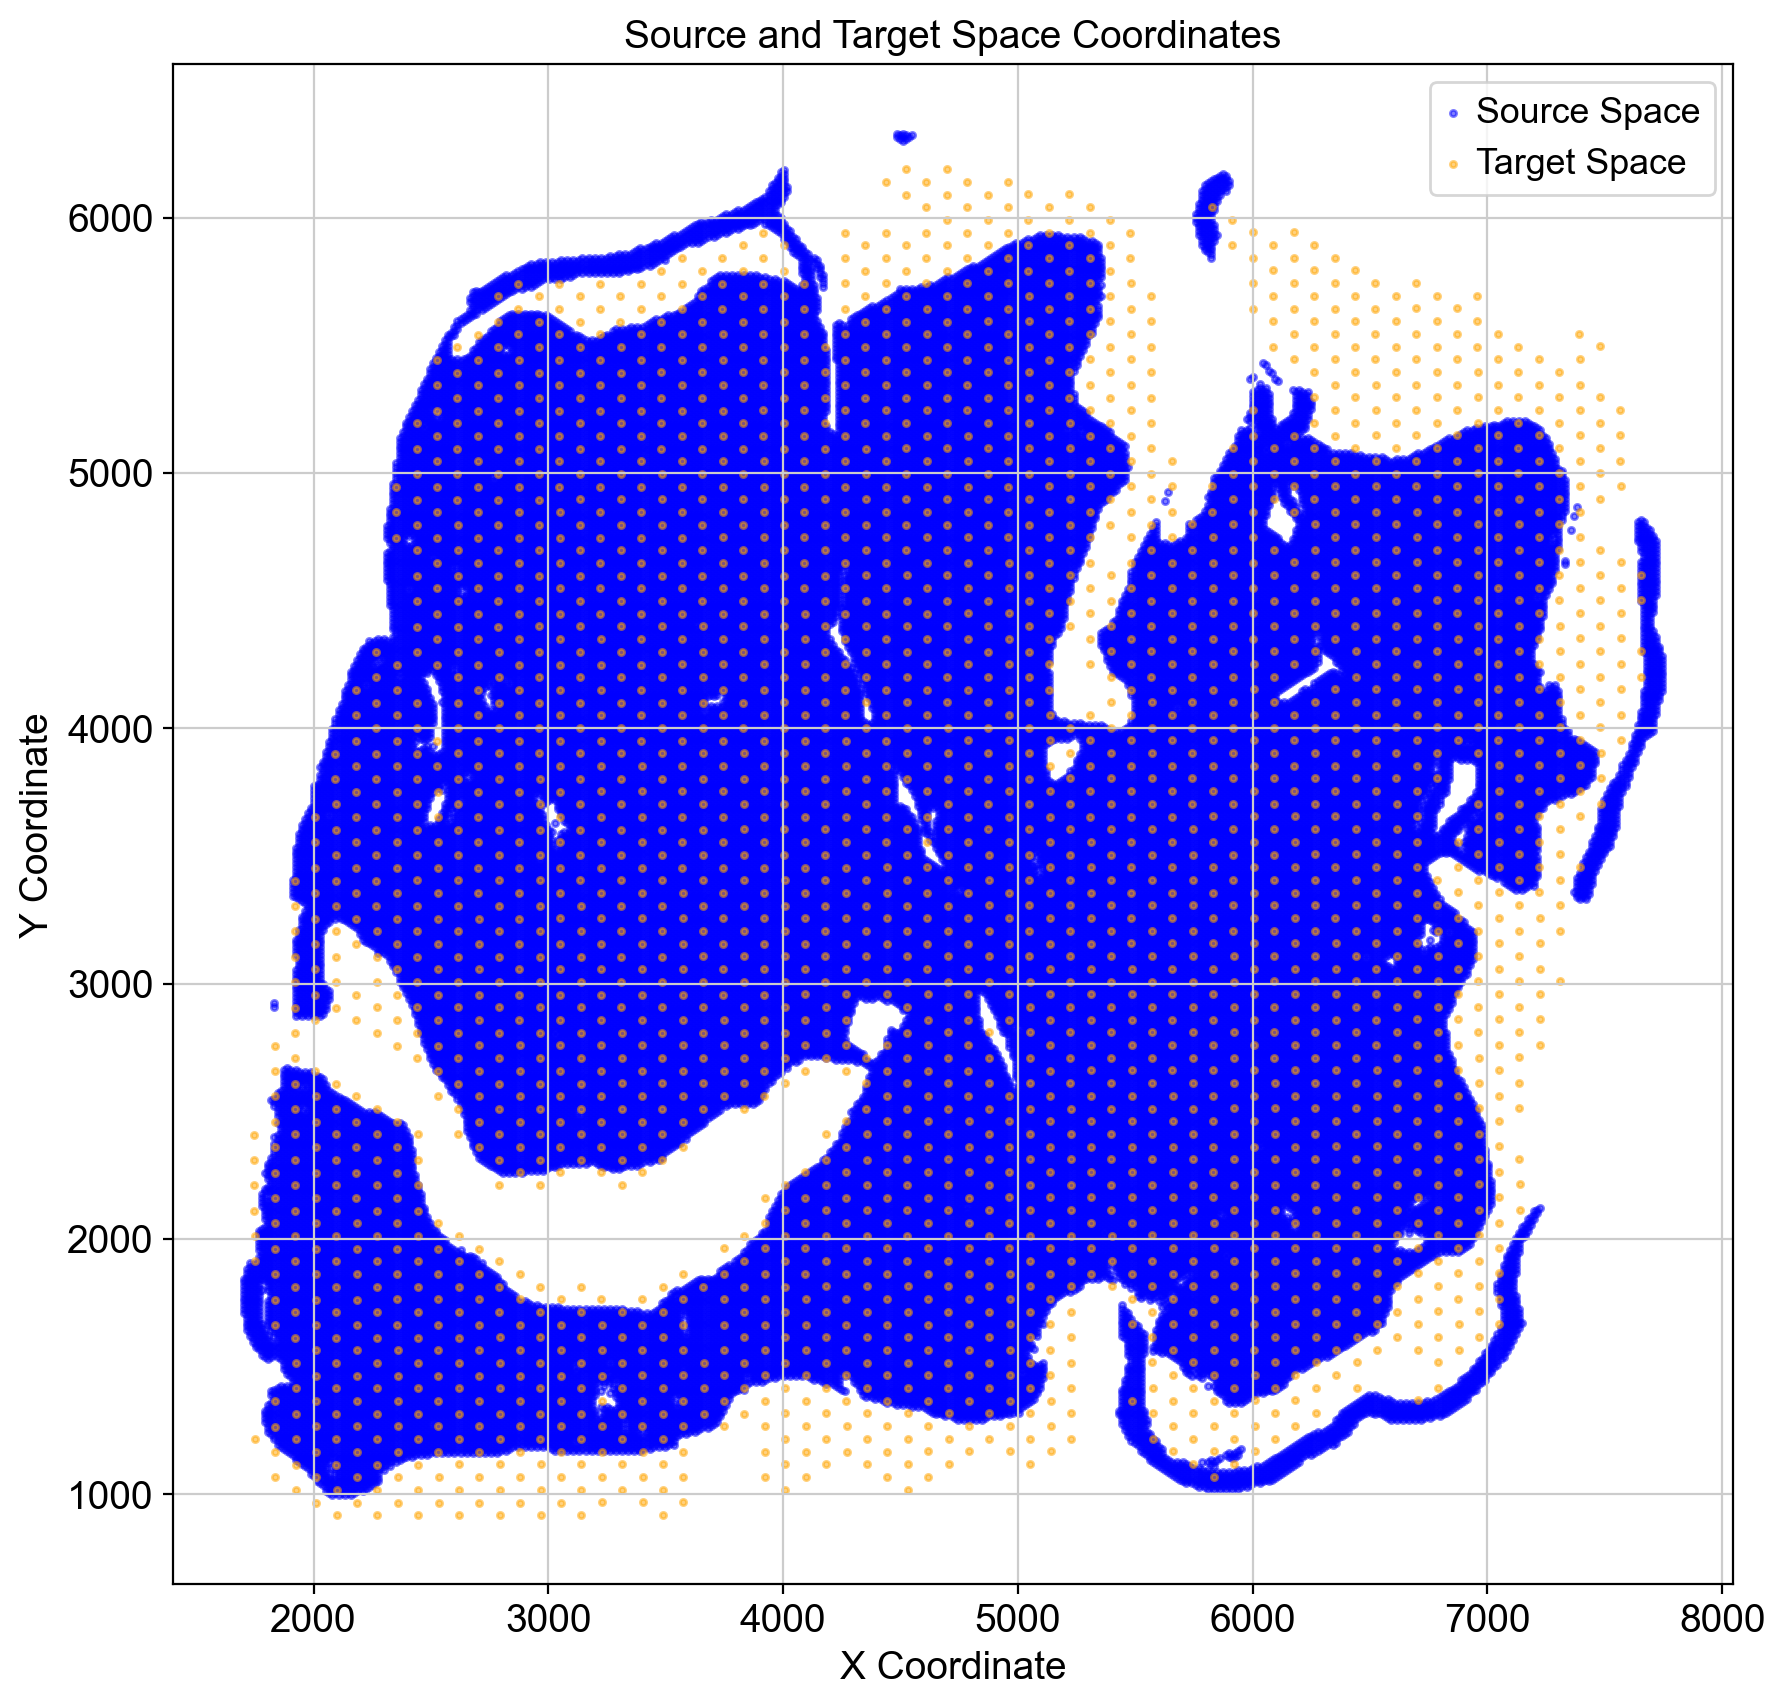

loaded annotation image - annotations_level_0 size - (4125, 4648)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_0 size - (4125, 4648)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
loaded annotation image - annotations_level_1 size - (4125, 4648)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
Generating grid with spacing - 15, from annotation resolution of - 0.5 ppm
loaded annotation image - annotations_level_1 size - (4125, 4648)
loaded annotation map
{1: 'unassigned', 2: 'PVS', 3: 'HS', 4: 'fat', 5: 'vessels'}
loaded ppm
{'ppm': 0.5}
calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
Medulla
unassigned
calculating distance matrix with

<Figure size 960x960 with 0 Axes>

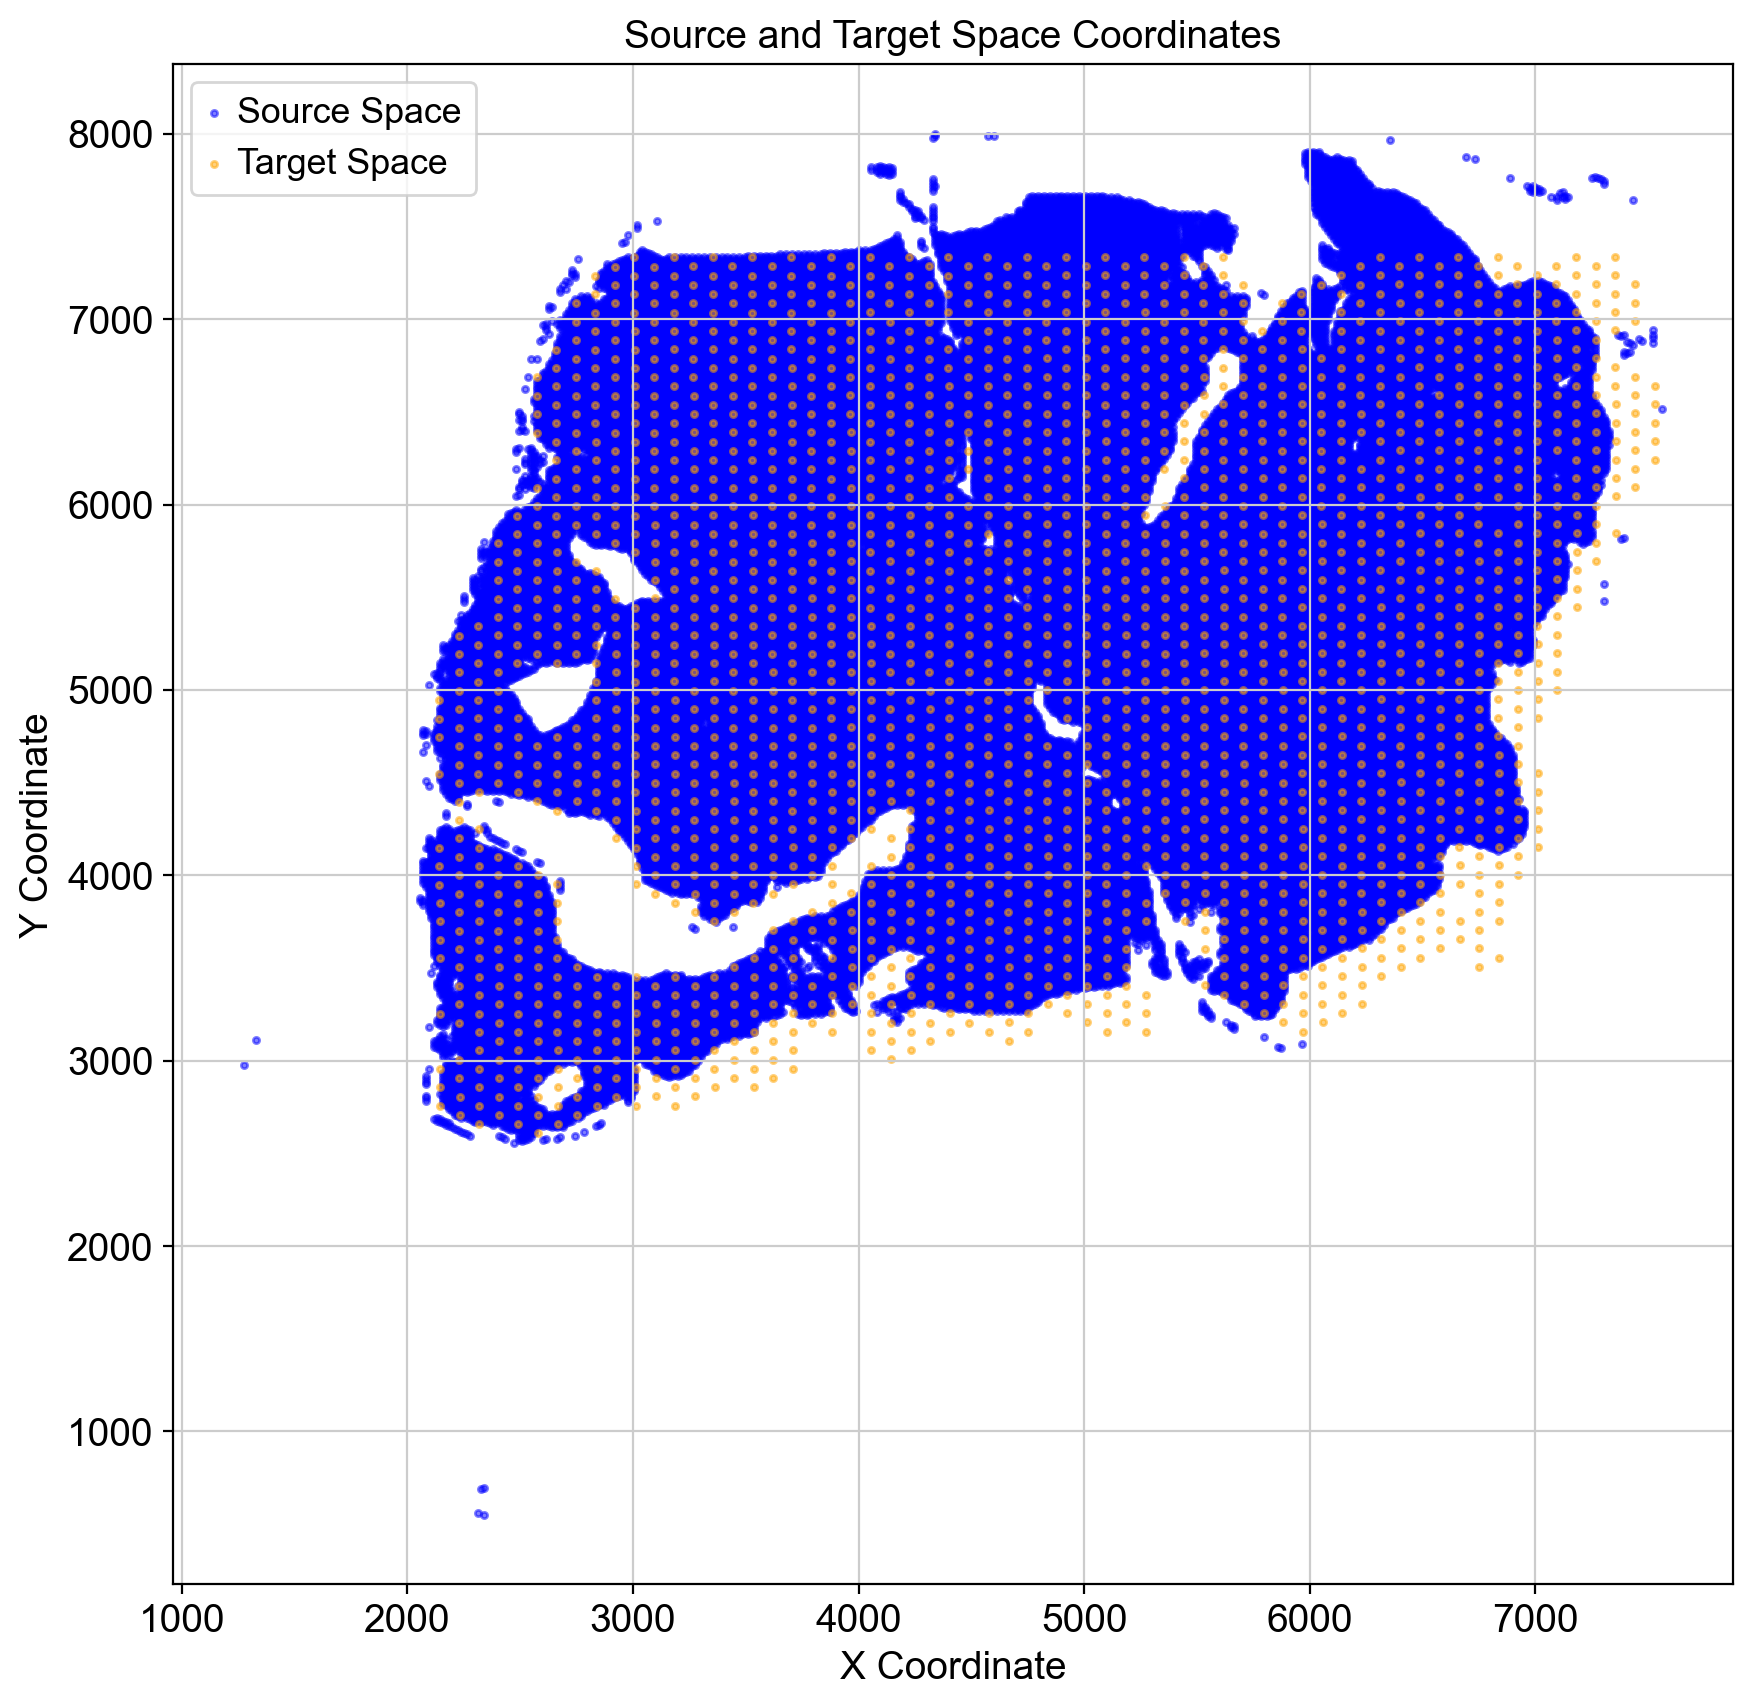

In [11]:
df_list_oct = []
for sample in samples_oct:
      df = generate_cma_simple(sample = sample, data_path = '/nfs/team205/vk8/irods_data/09_thymus/visium/all_thymus_visium/raw_data2/Align_and_detect_output/hsta',
                                 anno_name = ['annotations_level_0','annotations_level_1'],
                                 anno_main = 'annotations_level_0',
                                 grid_size = 15, KNN = 10, compartments3 = ['Edge','Cortex','Medulla'], 
                                 compartments2 = ['Edge','Medulla'], weights = [0.2,0.8], visium_type = 'OCT')
      df.index = sample+'-'+df.index
      df_list_oct.append(df)

In [12]:
df_oct = pd.concat(df_list_oct, axis=0)

In [13]:
df_oct

1     2     3            4            5  \
0                                                                          
TA11486162-ATACGCCGATCTACCG-1  1.0   1.0  31.0  6370.697953  1465.873588   
TA11486162-ACTTATCTGATCTATA-1  1.0   0.0  32.0  6315.858356  1370.180687   
TA11486162-GTGTGAGCCGAGGTGC-1  1.0   1.0  33.0  6261.079020  1466.002719   
TA11486162-GATGATTTGAAACTGG-1  1.0   0.0  34.0  6206.239423  1370.309817   
TA11486162-GGGAACCACCTGTTTC-1  1.0   1.0  35.0  6151.460086  1466.131849   
...                            ...   ...   ...          ...          ...   
TA11556496-TAGACTCAGTTGGCCT-1  1.0  70.0  14.0  7315.122690  8292.950903   
TA11556496-CAGTGTTAATCTCTCA-1  1.0  70.0  16.0  7205.526291  8293.134639   
TA11556496-GATCGCTGTGGTGCGT-1  1.0  70.0  18.0  7095.929892  8293.318375   
TA11556496-CCGGGCTAAGAATTTC-1  1.0  70.0  20.0  6986.333493  8293.502110   
TA11556496-CGGATGAATGCTGTGA-1  1.0  70.0  22.0  6876.737094  8293.685846   

                               pxl_row_in_fullres  pxl_col_in_fullres  \
0                                                                       
TA11486162-ATACGCCGATCTACCG-1         5783.115244         1330.673021   
TA11486162-ACTTATCTGATCTATA-1         5733.333617         1243.806075   
TA11486162-GTGTGAGCCGAGGTGC-1         5683.606692         1330.790242   
TA11486162-GATGATTTGAAACTGG-1         5633.825065         1243.923296   
TA11486162-GGGAACCACCTGTTTC-1         5584.098141         1330.907462   
...                                           ...                 ...   
TA11556496-TAGACTCAGTTGGCCT-1         6641.644816         7529.447791   
TA11556496-CAGTGTTAATCTCTCA-1         6542.138576         7529.614611   
TA11556496-GATCGCTGTGGTGCGT-1         6442.632336         7529.781430   
TA11556496-CCGGGCTAAGAATTTC-1         6343.126096         7529.948250   
TA11556496-CGGATGAATGCTGTGA-1         6243.619856         7530.115070   

                                         x            y  \
0                                                         
TA11486162-ATACGCCGATCTACCG-1   286.303435  1244.276944   
TA11486162-ACTTATCTGATCTATA-1   267.613415  1233.566085   
TA11486162-GTGTGAGCCGAGGTGC-1   286.328656  1222.866996   
TA11486162-GATGATTTGAAACTGG-1   267.638636  1212.156137   
TA11486162-GGGAACCACCTGTTTC-1   286.353877  1201.457048   
...                                    ...          ...   
TA11556496-TAGACTCAGTTGGCCT-1  1619.716973  1428.734900   
TA11556496-CAGTGTTAATCTCTCA-1  1619.752859  1407.329354   
TA11556496-GATCGCTGTGGTGCGT-1  1619.788745  1385.923807   
TA11556496-CCGGGCTAAGAATTTC-1  1619.824631  1364.518260   
TA11556496-CGGATGAATGCTGTGA-1  1619.860517  1343.112714   

                               L2_dist_annotations_cma_Artifacts  \
0                                                                  
TA11486162-ATACGCCGATCTACCG-1                          48.431493   
TA11486162-ACTTATCTGATCTATA-1                                NaN   
TA11486162-GTGTGAGCCGAGGTGC-1                          95.611563   
TA11486162-GATGATTTGAAACTGG-1                          67.859557   
TA11486162-GGGAACCACCTGTTTC-1                          88.990563   
...                                                          ...   
TA11556496-TAGACTCAGTTGGCCT-1                                NaN   
TA11556496-CAGTGTTAATCTCTCA-1                                NaN   
TA11556496-GATCGCTGTGGTGCGT-1                                NaN   
TA11556496-CCGGGCTAAGAATTTC-1                                NaN   
TA11556496-CGGATGAATGCTGTGA-1                                NaN   

                               L2_dist_annotations_cma_Cortex  \
0                                                               
TA11486162-ATACGCCGATCTACCG-1                       16.794229   
TA11486162-ACTTATCTGATCTATA-1                             NaN   
TA11486162-GTGTGAGCCGAGGTGC-1                       16.794229   
TA11486162-GATGATTTGAAACTGG-1                       16.794229   
TA11486162-GGGAACCACCTGTTTC-1                      

### Adding CMA bins

In [14]:
ct_order = ['Capsular','Sub-Capsular','Cortical level 1','Cortical level 2','Cortical level 3','Cortical CMJ','Medullar CMJ','Medullar level 1','Medullar level 2','Medullar level 3']
ct2_values = [-0.75,-0.62,-0.55,-0.45,-0.3,0.1,0.55,0.65,0.7]

In [15]:
df_merged = df_oct.copy()

In [16]:
df_merged.loc[df_merged['annotations_cma'].isnull()]

1     2     3            4            5  \
0                                                                          
TA11486162-ACTTATCTGATCTATA-1  1.0   0.0  32.0  6315.858356  1370.180687   
TA11486162-CACGATTGGTCGTTAA-1  1.0   0.0  50.0  5329.287954  1371.342862   
TA11486162-TCTTATGGGTAGTACC-1  1.0   0.0  52.0  5219.669020  1371.471992   
TA11486162-GTATCTTGTTGCTCAC-1  1.0   0.0  54.0  5110.050086  1371.601123   
TA11486162-ATGGTGCTCAAAGCCA-1  1.0   1.0  57.0  4945.651816  1467.552285   
...                            ...   ...   ...          ...          ...   
TA11556496-TAGACTCAGTTGGCCT-1  1.0  70.0  14.0  7315.122690  8292.950903   
TA11556496-CAGTGTTAATCTCTCA-1  1.0  70.0  16.0  7205.526291  8293.134639   
TA11556496-GATCGCTGTGGTGCGT-1  1.0  70.0  18.0  7095.929892  8293.318375   
TA11556496-CCGGGCTAAGAATTTC-1  1.0  70.0  20.0  6986.333493  8293.502110   
TA11556496-CGGATGAATGCTGTGA-1  1.0  70.0  22.0  6876.737094  8293.685846   

                               pxl_row_in_fullres  pxl_col_in_fullres  \
0                                                                       
TA11486162-ACTTATCTGATCTATA-1         5733.333617         1243.806075   
TA11486162-CACGATTGGTCGTTAA-1         4837.756652         1244.861060   
TA11486162-TCTTATGGGTAGTACC-1         4738.248100         1244.978281   
TA11486162-GTATCTTGTTGCTCAC-1         4638.739549         1245.095501   
TA11486162-ATGGTGCTCAAAGCCA-1         4489.504073         1332.196888   
...                                           ...                 ...   
TA11556496-TAGACTCAGTTGGCCT-1         6641.644816         7529.447791   
TA11556496-CAGTGTTAATCTCTCA-1         6542.138576         7529.614611   
TA11556496-GATCGCTGTGGTGCGT-1         6442.632336         7529.781430   
TA11556496-CCGGGCTAAGAATTTC-1         6343.126096         7529.948250   
TA11556496-CGGATGAATGCTGTGA-1         6243.619856         7530.115070   

                                         x            y  \
0                                                         
TA11486162-ACTTATCTGATCTATA-1   267.613415  1233.566085   
TA11486162-CACGATTGGTCGTTAA-1   267.840403  1040.876553   
TA11486162-TCTTATGGGTAGTACC-1   267.865623  1019.466605   
TA11486162-GTATCTTGTTGCTCAC-1   267.890844   998.056657   
TA11486162-ATGGTGCTCAAAGCCA-1   286.631306   965.947620   
...                                    ...          ...   
TA11556496-TAGACTCAGTTGGCCT-1  1619.716973  1428.734900   
TA11556496-CAGTGTTAATCTCTCA-1  1619.752859  1407.329354   
TA11556496-GATCGCTGTGGTGCGT-1  1619.788745  1385.923807   
TA11556496-CCGGGCTAAGAATTTC-1  1619.824631  1364.518260   
TA11556496-CGGATGAATGCTGTGA-1  1619.860517  1343.112714   

                               L2_dist_annotations_cma_Artifacts  \
0                                                                  
TA11486162-ACTTATCTGATCTATA-1                                NaN   
TA11486162-CACGATTGGTCGTTAA-1                                NaN   
TA11486162-TCTTATGGGTAGTACC-1                                NaN   
TA11486162-GTATCTTGTTGCTCAC-1                                NaN   
TA11486162-ATGGTGCTCAAAGCCA-1                                NaN   
...                                                          ...   
TA11556496-TAGACTCAGTTGGCCT-1                                NaN   
TA11556496-CAGTGTTAATCTCTCA-1                                NaN   
TA11556496-GATCGCTGTGGTGCGT-1                                NaN   
TA11556496-CCGGGCTAAGAATTTC-1                                NaN   
TA11556496-CGGATGAATGCTGTGA-1                                NaN   

                               L2_dist_annotations_cma_Cortex  \
0                                                               
TA11486162-ACTTATCTGATCTATA-1                             NaN   
TA11486162-CACGATTGGTCGTTAA-1                             NaN   
TA11486162-TCTTATGGGTAGTACC-1                             NaN   
TA11486162-GTATCTTGTTGCTCAC-1                             NaN   
TA11486162-ATGGTGCTCAAAGCCA-1                      

In [17]:
np.mean(df_merged['annotations_cma'].isnull())

0.13055301346581252

In [18]:
df_merged = df_merged.loc[~df_merged['annotations_cma'].isnull()].copy()

In [19]:
df_merged = tt.bin_axis(ct_order=ct_order, cutoff_values=ct2_values,df=df_merged, axis_anno_name='cma_3p')

Capsular= (-0.75>cma_3p)
Sub-Capsular= (-0.75<=cma_3p) & (-0.62>cma_3p)
Cortical level 1= (-0.62<=cma_3p) & (-0.55>cma_3p)
Cortical level 2= (-0.55<=cma_3p) & (-0.45>cma_3p)
Cortical level 3= (-0.45<=cma_3p) & (-0.3>cma_3p)
Cortical CMJ= (-0.3<=cma_3p) & (0.1>cma_3p)
Medullar CMJ= (0.1<=cma_3p) & (0.55>cma_3p)
Medullar level 1= (0.55<=cma_3p) & (0.65>cma_3p)
Medullar level 2= (0.65<=cma_3p) & (0.7>cma_3p)
Medullar level 3= (0.7=<cma_3p)


In [20]:
df_merged.to_csv(f'{results_path}/ThyAge_Visium_epaed_OCT_annos_merged_{date}.csv', index = True)